Fraud Detection and Prediction - Classical

*===========================================*

***UnBalanced Data and without feature selection.***
____________________________________________________________________________________________

***Classical Models Used***
* Over-Sampling
    * Linear Model
    * K-Nearest Neighbour
    * Naiyve Bayes
    * Decision Tree
    * Random Forest
* Under-Sampling
    * Support Vector Machine (Sigmoid, Linear, Poly, RBF)



**Author:** *Bipul Sinha*


In [1]:
! pip install --upgrade imblearn


[notice] A new release of pip is available: 24.1 -> 24.1.1
[notice] To update, run: d:\CodingPlayground\Quantum\FraudDetection\.venv\Scripts\python.exe -m pip install --upgrade pip


# 0. Pre-requisite -> Loading Dataset
 - Fraud Detection dataset will be loaded from Kaggle
 - Link @link(https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)
 
 *Note: - Run these steps only for the 1st time to download dataset from Kaggle or you haven't downloaded it earlier*

In [2]:
import warnings 
warnings.filterwarnings("ignore")

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import seaborn as sns

import time


# 1. Data Exploration

In [3]:
from load_dataset import read_csv_file
df = read_csv_file('creditcardfraud.zip') # provide name of the zip file instead of csv file
df.describe().T # Data Summary

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

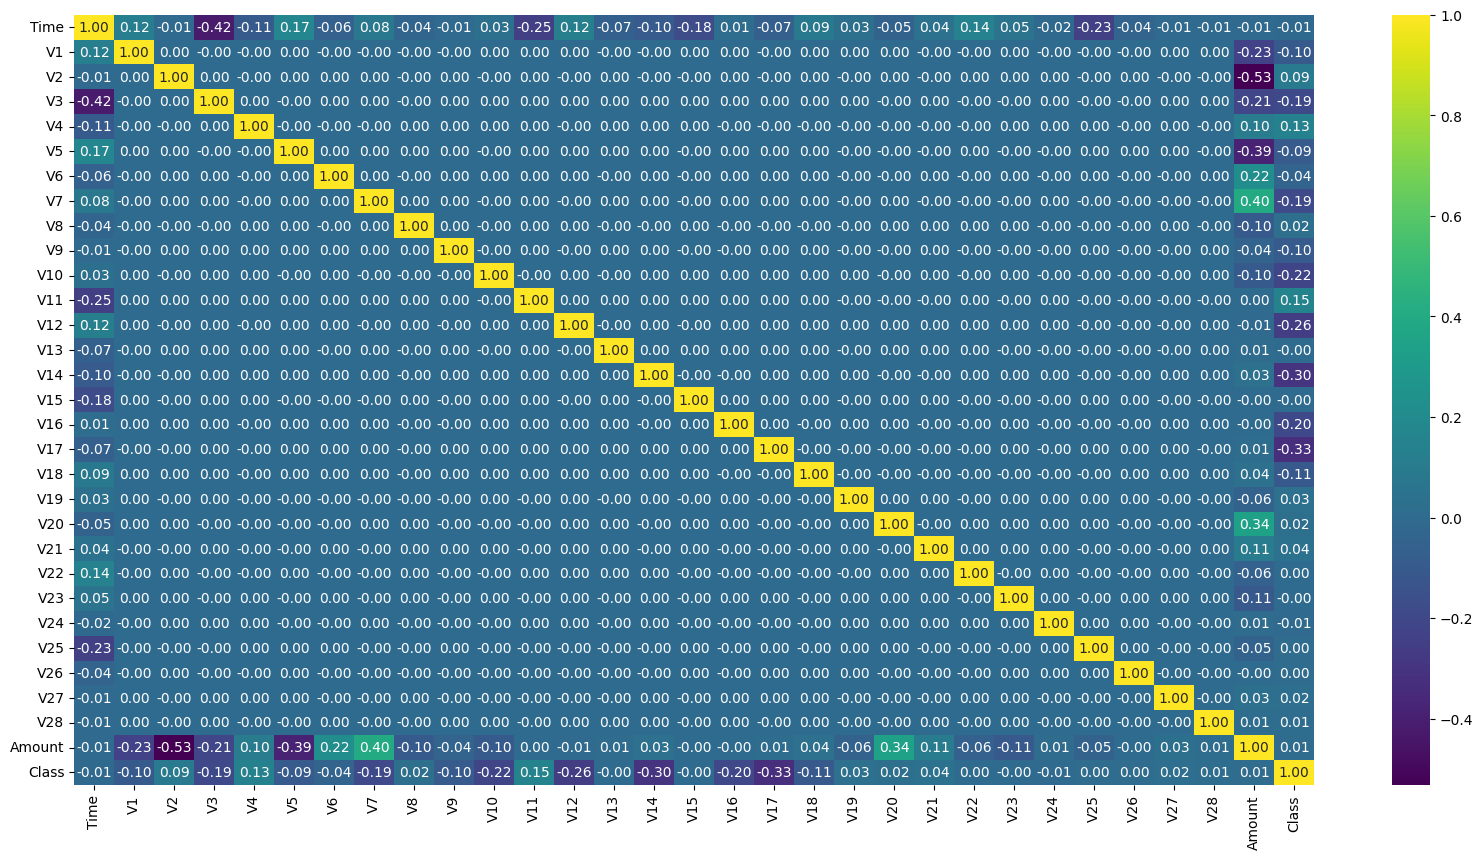

In [6]:
import seaborn as sns
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cbar=True, cmap='viridis')
plt.show()

## 1a. Understanding and evaluating data
* Since, we are unable to see data from other than Class 0, we need data evaluation.
* Plus, the number of instances of fraudelent data are less in numbers we need to pump-up the fraudelent data.

In [7]:
df.shape #Prints number of rows and columns

(284807, 31)

In [8]:
class_count = df["Class"].value_counts()
class_count

Class
0    284315
1       492
Name: count, dtype: int64

In [9]:
print("Class 0 :" , class_count[0])
print("Class 1 :" , class_count[1])

Class 0 : 284315
Class 1 : 492


Target distribution "1" & "0" in column "Class", legal and fraudulent transactions, respectively, pieces
0: 284315
1: 492
Imbalance degree: 1: 577.88
 
Target distribution "1" & "0" in column "Class", legal and fraudulent transactions, respectively, %
Class
0    99.827251
1     0.172749
Name: Class, dtype: float64


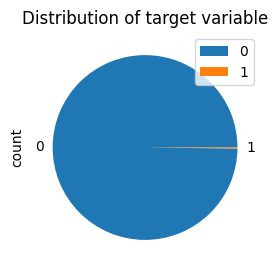

In [10]:
import pylab
pylab.rcParams['figure.figsize'] = (8, 5)

# Target distribution
print('Target distribution "1" & "0" in column "Class", legal and fraudulent transactions, respectively, pieces')
target_count = df['Class'].value_counts()
print('0:', target_count[0])
print('1:', target_count[1])
print('Imbalance degree:', '1:', round(target_count[0] / target_count[1], 2))
print (' ')
print('Target distribution "1" & "0" in column "Class", legal and fraudulent transactions, respectively, %')
print((df.groupby('Class')['Class'].count()/df['Class'].count())*100)


pylab.rcParams['figure.figsize'] = (4, 3)
target_count.plot(kind='pie', title='Distribution of target variable', legend="true");

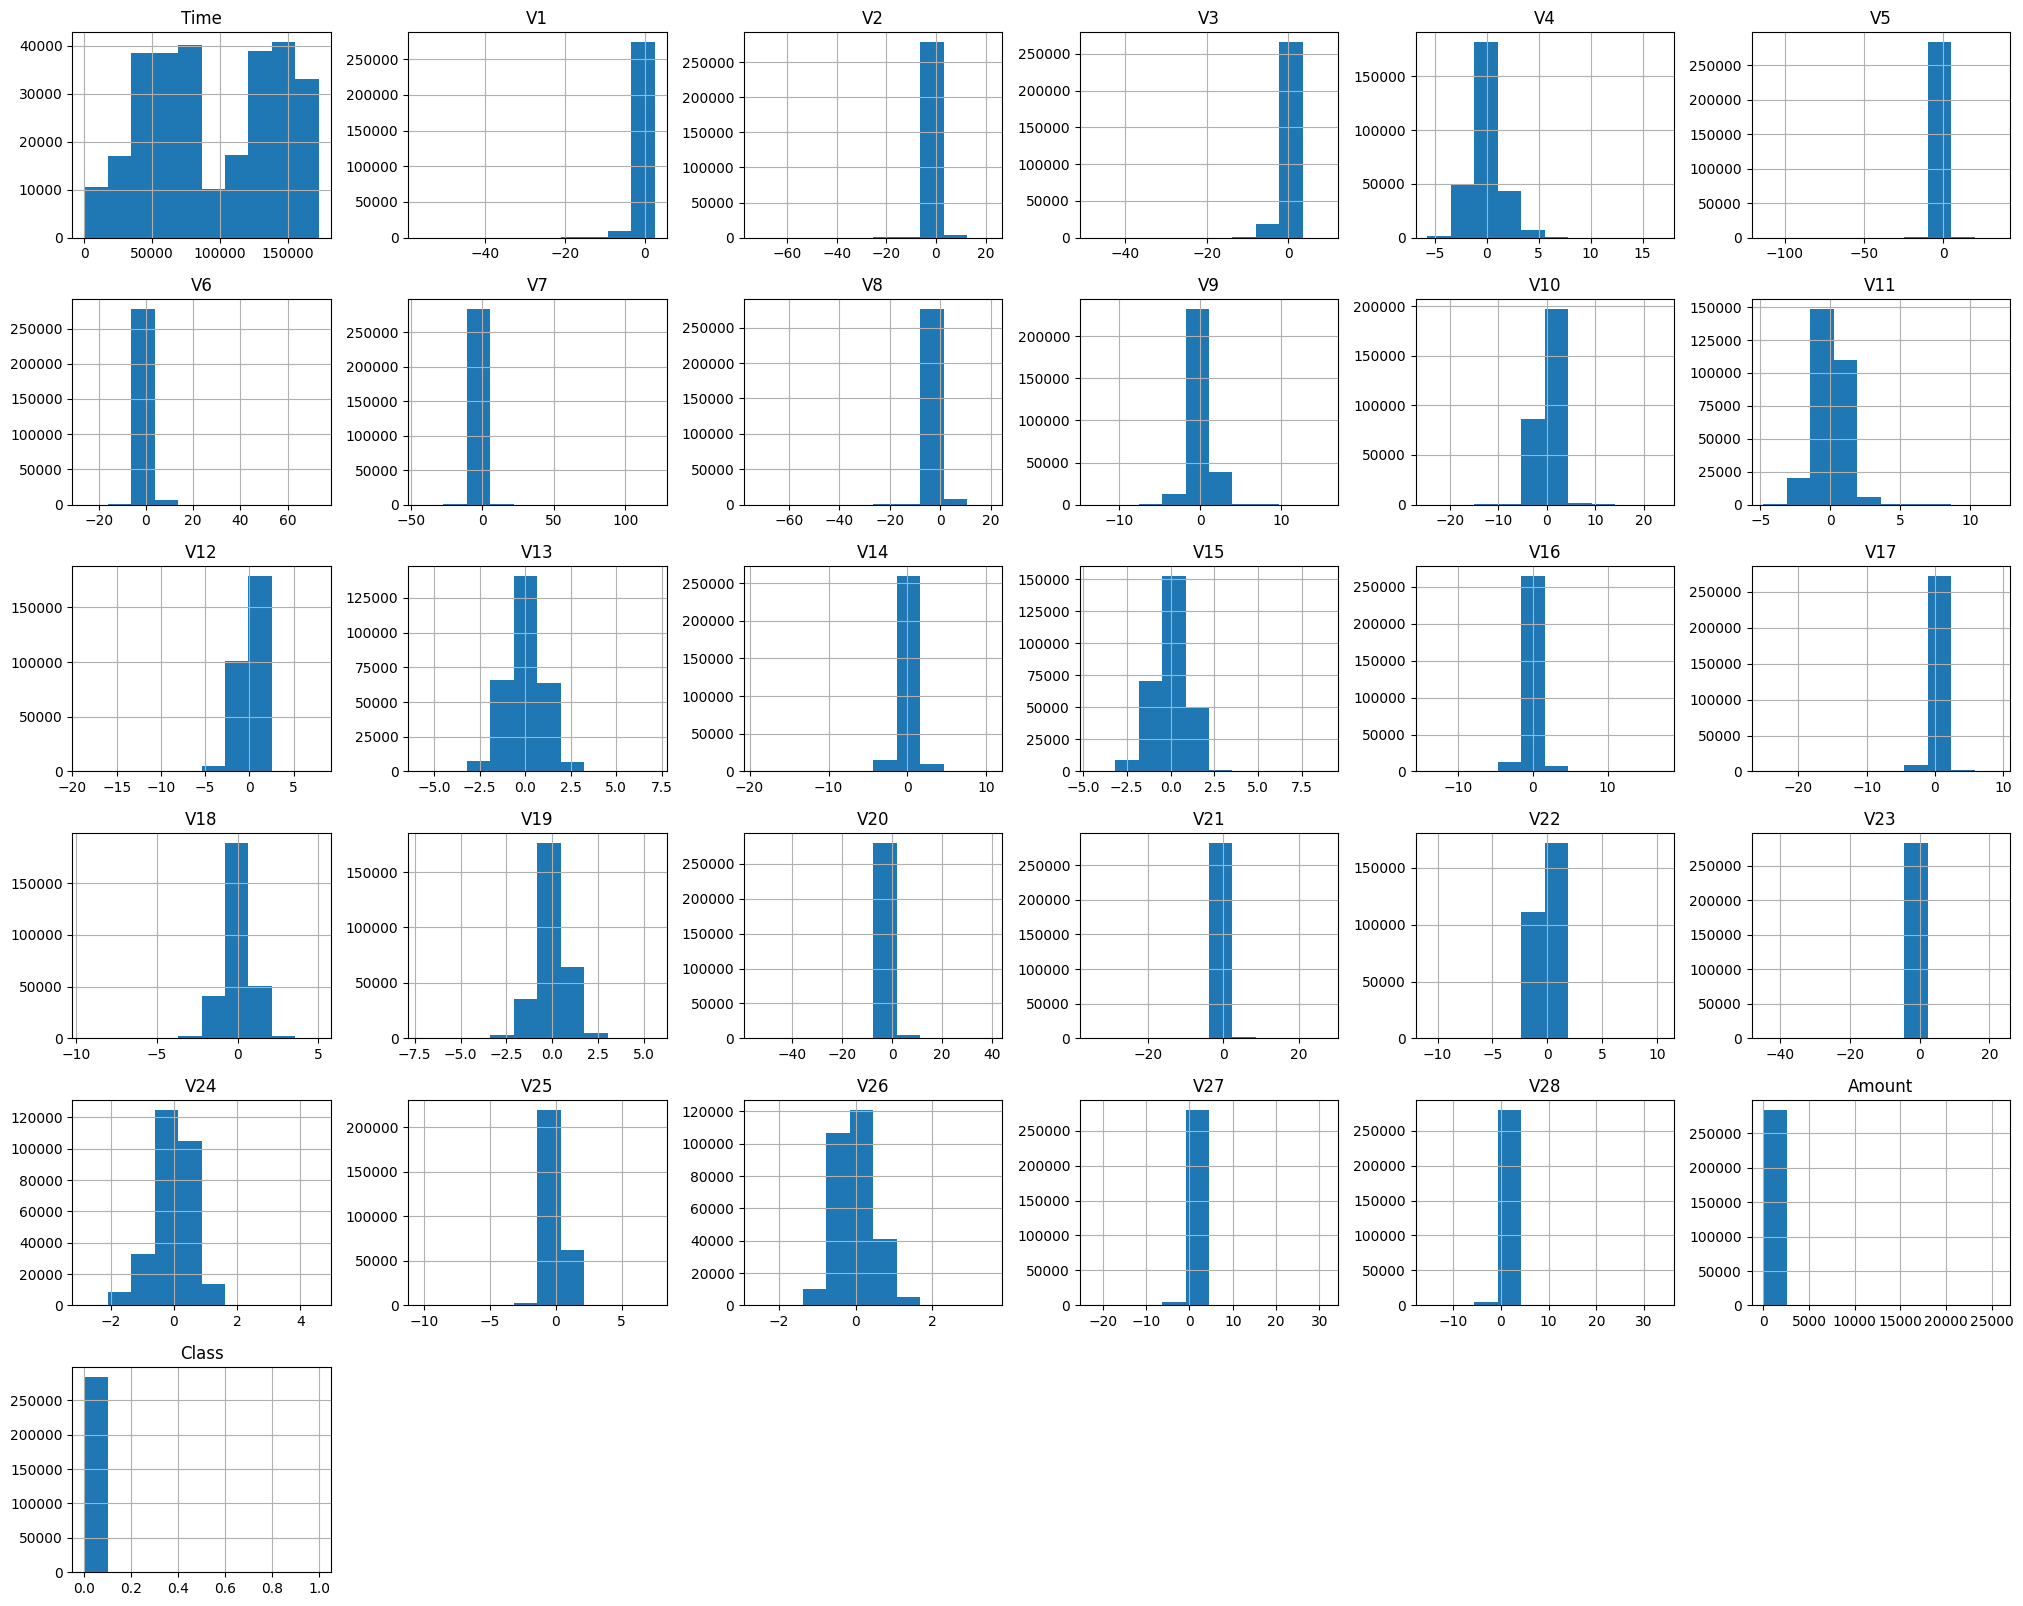

In [11]:
df.hist(figsize=(25,20))
plt.show()

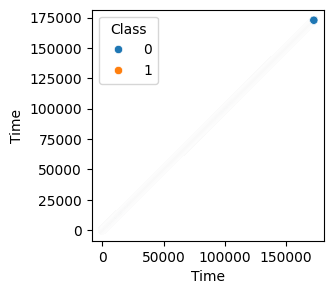

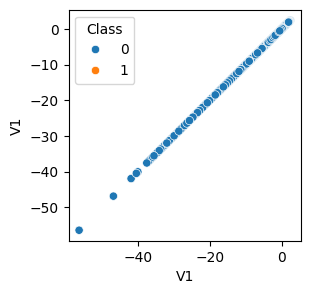

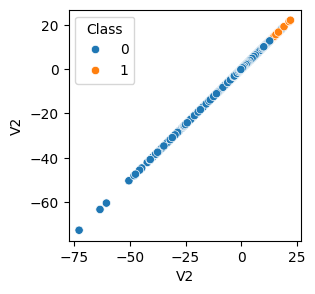

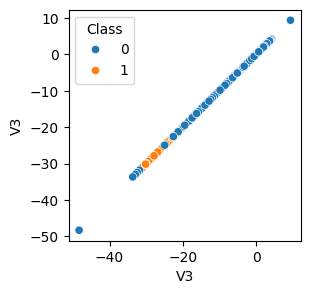

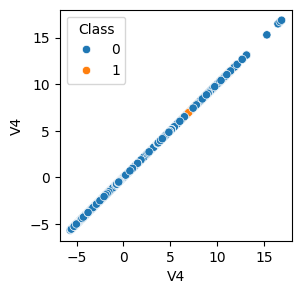

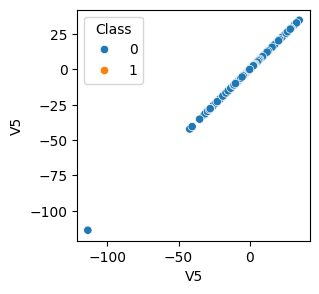

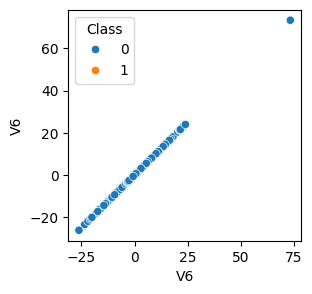

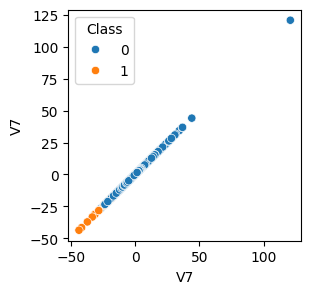

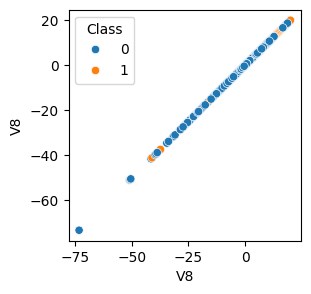

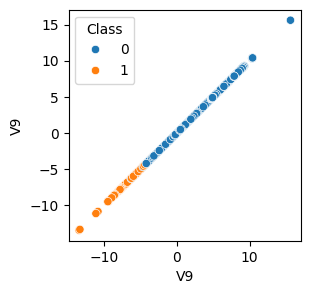

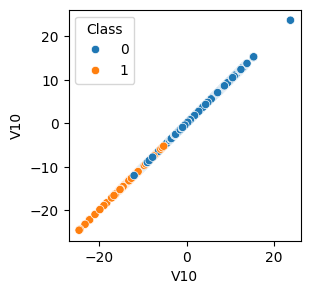

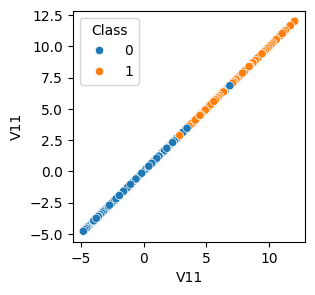

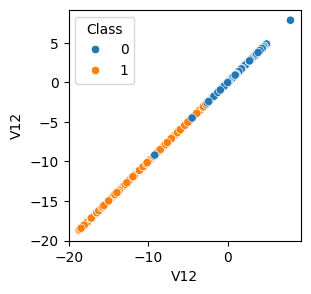

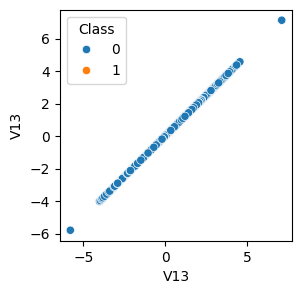

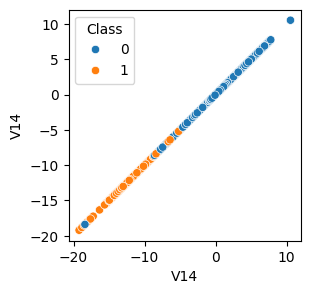

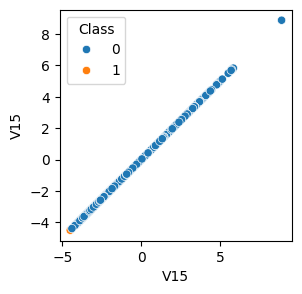

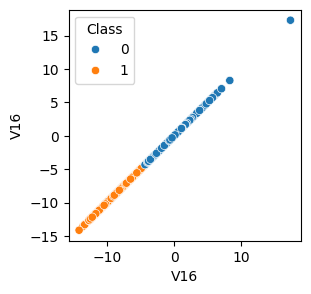

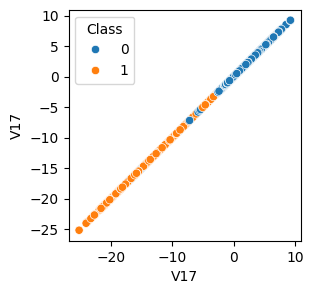

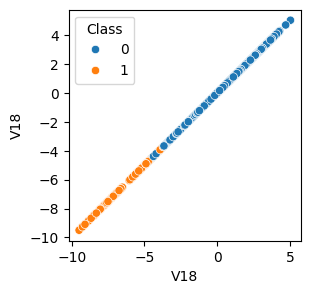

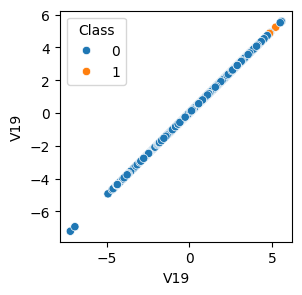

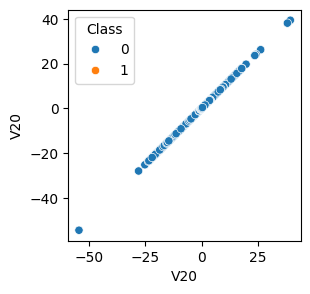

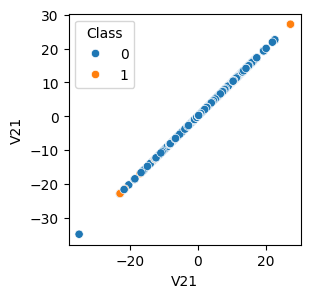

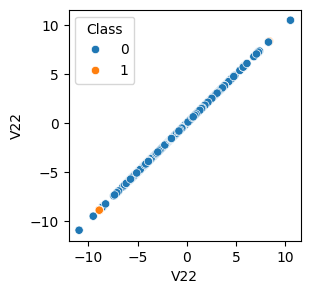

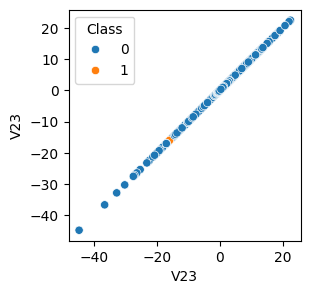

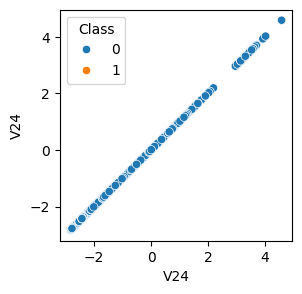

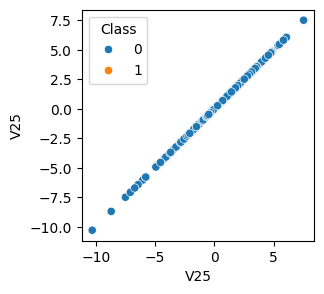

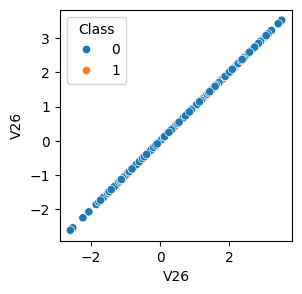

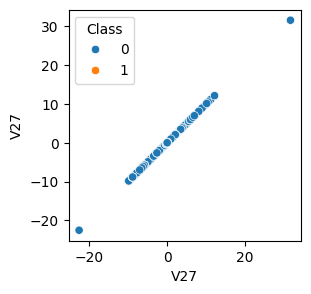

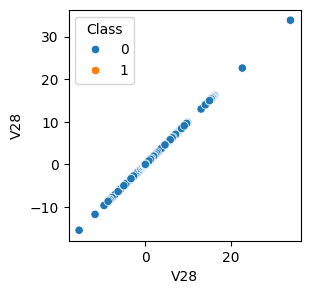

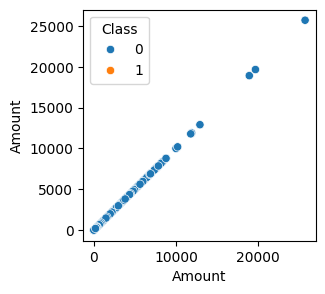

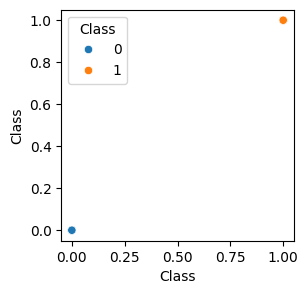

In [12]:
import numpy as np

features = list(df.columns)  # Assuming "Class" is not a feature
correlations = np.abs(df.corr())  # Get absolute correlations
strong_correlations = np.where(correlations > 0.7)  # Adjust threshold as needed
feature_pairs = [(features[i], features[j]) for i, j in zip(*strong_correlations)]



for x, y in feature_pairs:
    plt.figure(figsize=(3,3))
    #plt.subplots(2,2,figsize=(3,3) )
    sns.scatterplot(x=x, y=y, hue="Class", data=df, palette="tab10")
    plt.show()


In [14]:
#sns.pairplot(df.sample(1000), hue="Class", palette="tab10")
#plt.show()
# Reduce data size (optional)
# sample_size = 1000
# df_sample = df.sample(sample_size)

# Use individual scatter plots
#import matplotlib.pyplot as plt

#features = list(df.columns)  # Assuming "Class" is not a feature

#for i in range(len(features) - 1):
#  for j in range(i + 1, len(features)):
#    sns.scatterplot(
#        x=features[i], y=features[j], hue="Class", data=df, palette="tab10",
#    )
#    plt.show()  # Display each plot individually

# Free up memory (optional)
import gc; gc.collect()


35654

# 2. Data Cleansing

* Remove duplicates and clean the data from such instances

### Removing Duplicates

In [4]:
df.duplicated().any
df.duplicated().sum()

1081

In [5]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

# 4. Model Training and Fraud Prediction

## i) Get X-Axis and Y-Axis data

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
# Taking columns v1 to v28 plus amount and remocing Class
x= df.iloc[:,0:30].values # Remove .values to view data in tabular structure
x

array([[ 0.00000000e+00, -1.35980713e+00, -7.27811733e-02, ...,
         1.33558377e-01, -2.10530535e-02,  1.49620000e+02],
       [ 0.00000000e+00,  1.19185711e+00,  2.66150712e-01, ...,
        -8.98309914e-03,  1.47241692e-02,  2.69000000e+00],
       [ 1.00000000e+00, -1.35835406e+00, -1.34016307e+00, ...,
        -5.53527940e-02, -5.97518406e-02,  3.78660000e+02],
       ...,
       [ 1.72788000e+05,  1.91956501e+00, -3.01253846e-01, ...,
         4.45477214e-03, -2.65608286e-02,  6.78800000e+01],
       [ 1.72788000e+05, -2.40440050e-01,  5.30482513e-01, ...,
         1.08820735e-01,  1.04532821e-01,  1.00000000e+01],
       [ 1.72792000e+05, -5.33412522e-01, -1.89733337e-01, ...,
        -2.41530880e-03,  1.36489143e-02,  2.17000000e+02]])

In [8]:
# Considering class as Y attribute
y = df.iloc[:,30].values
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test =  train_test_split(x,y, test_size = 0.2)

print("X-train", len(x_train))
print("X-test", len(x_test))
print("Y-train", len(y_train))
print("Y-test", len(y_test))

labels = ['Class 0', 'Class 1']


X-train 226980
X-test 56746
Y-train 226980
Y-test 56746


In [10]:
# Dictionary to store model result
comparison_results = {}

### Model 1 - Logistic Regression Model

Time taken to train the model:: 2.73
Time taken to predict on train data:: 0.03
Time taken to predict on test data:: 0.00
Accuracy on train dataset::  1.00
Accuracy on test dataset::  1.00
Accuracy calcuated using accuracy_score::  1.00
Train Accuracy: 1.00
Train Precision: 0.72
Train Recall: 0.67
Test Accuracy: 1.00
Test Precision: 0.69
Test Recall: 0.45


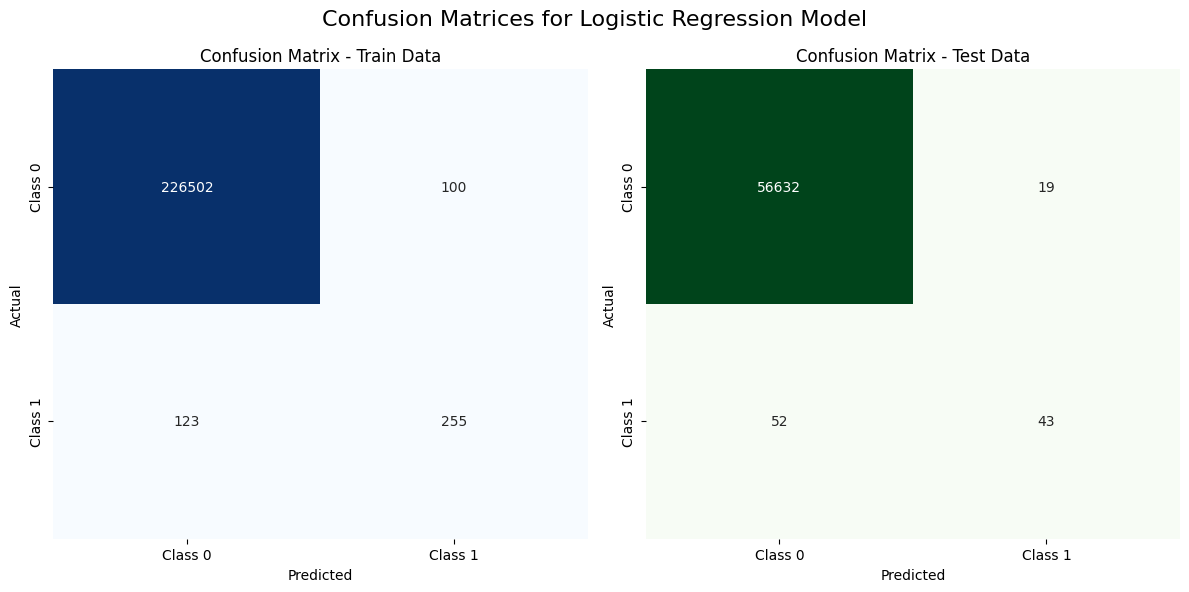

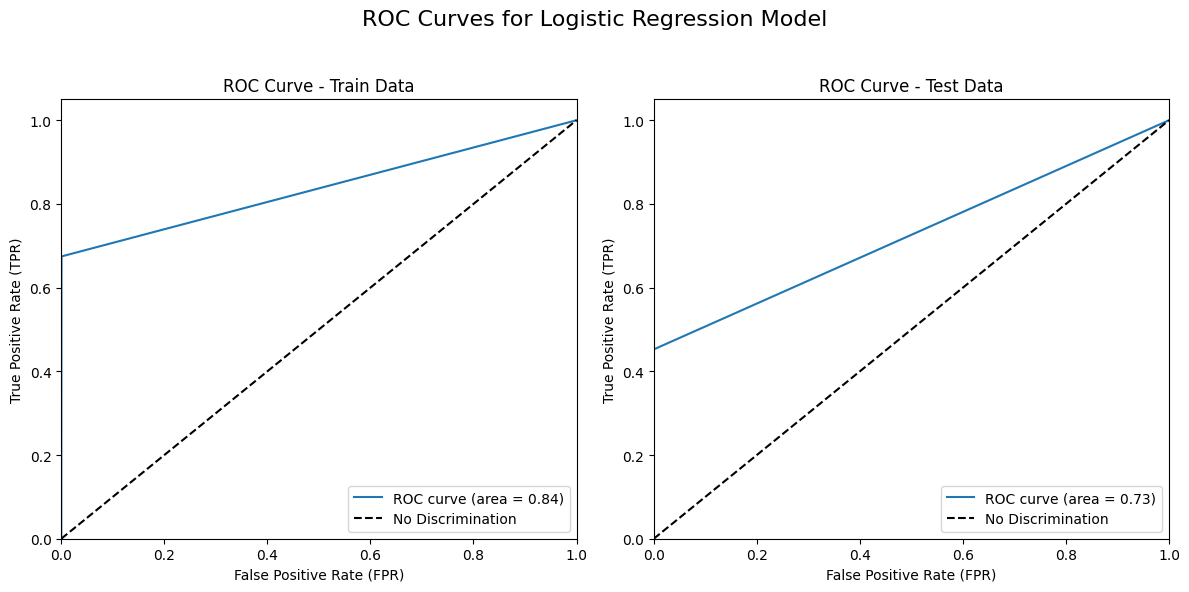

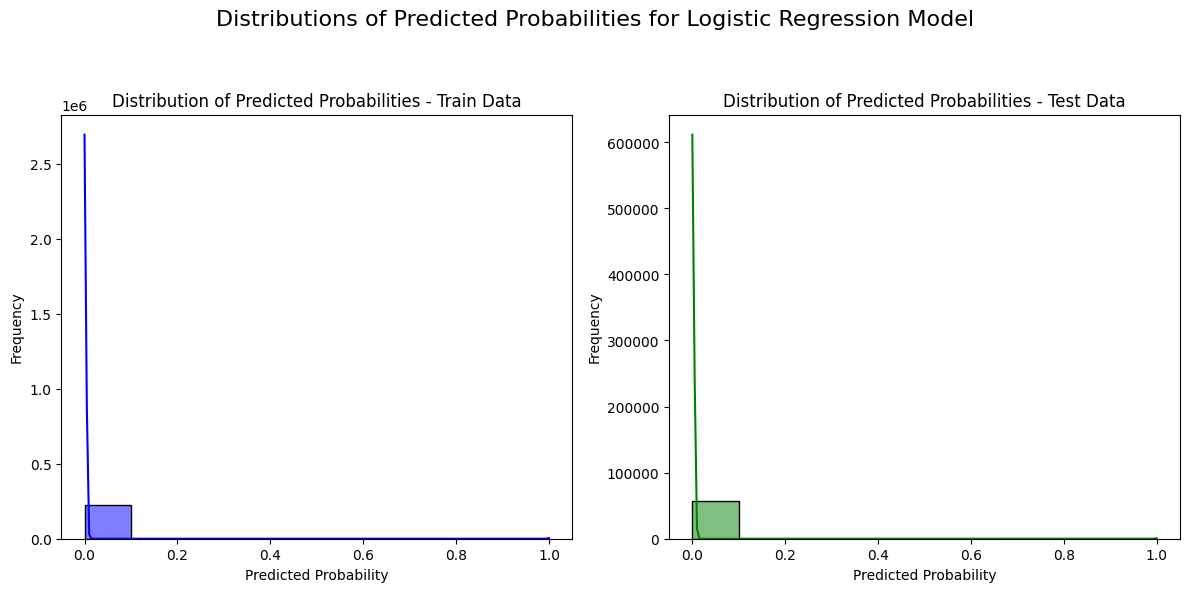

'{\n "LogisticRegression": {\n  "train": {\n   "accuracy": 0.9990175345845449,\n   "precision": 0.7183098591549296,\n   "recall": 0.6746031746031746\n  },\n  "test": {\n   "accuracy": 0.998748810488845,\n   "precision": 0.6935483870967742,\n   "recall": 0.45263157894736844\n  },\n  "sampling": "-"\n }\n}'

In [11]:
from sklearn.linear_model import LogisticRegression
import time

logmodel = LogisticRegression(random_state=42, max_iter=100)

# Train the model
start_time = time.time()
logmodel.fit(x_train, y_train)
end_time = time.time()
duration = end_time - start_time
print(f"Time taken to train the model:: {duration:.2f}")
start_time = time.time()
y_train_pred = logmodel.predict(x_train)
end_time = time.time()
duration = end_time - start_time
print(f"Time taken to predict on train data:: {duration:.2f}")
start_time = time.time()
y_test_pred = logmodel.predict(x_test)
end_time = time.time()
duration = end_time - start_time
print(f"Time taken to predict on test data:: {duration:.2f}")
import importlib
import utilties
importlib.reload(utilties)

from utilties import accuracy_score, plot_confusion_matrix, show_result



accuracy = logmodel.score(x_train, y_train)
print(f"Accuracy on train dataset::  {accuracy:.2f}")

accuracy = logmodel.score(x_test, y_test)
print(f"Accuracy on test dataset::  {accuracy:.2f}")
accuracy = accuracy_score(y_test, y_test_pred)
accuracy
print(f"Accuracy calcuated using accuracy_score::  {accuracy:.2f}")
import importlib
import utilties
importlib.reload(utilties)

from utilties import print_comparision_result, show_result

comparison_results["LogisticRegression"] = show_result(y_train, y_train_pred, y_test, y_test_pred, labels,  "Logistic Regression", "-")
print_comparision_result(comparison_results)



### Model 2. K Nearest Neighbour

Time taken to train the model:: 0.03
Time taken to predict on train data:: 94.92
Time taken to predict on test data:: 21.86
Train Accuracy: 1.00
Train Precision: 0.72
Train Recall: 0.67
Test Accuracy: 1.00
Test Precision: 0.69
Test Recall: 0.45


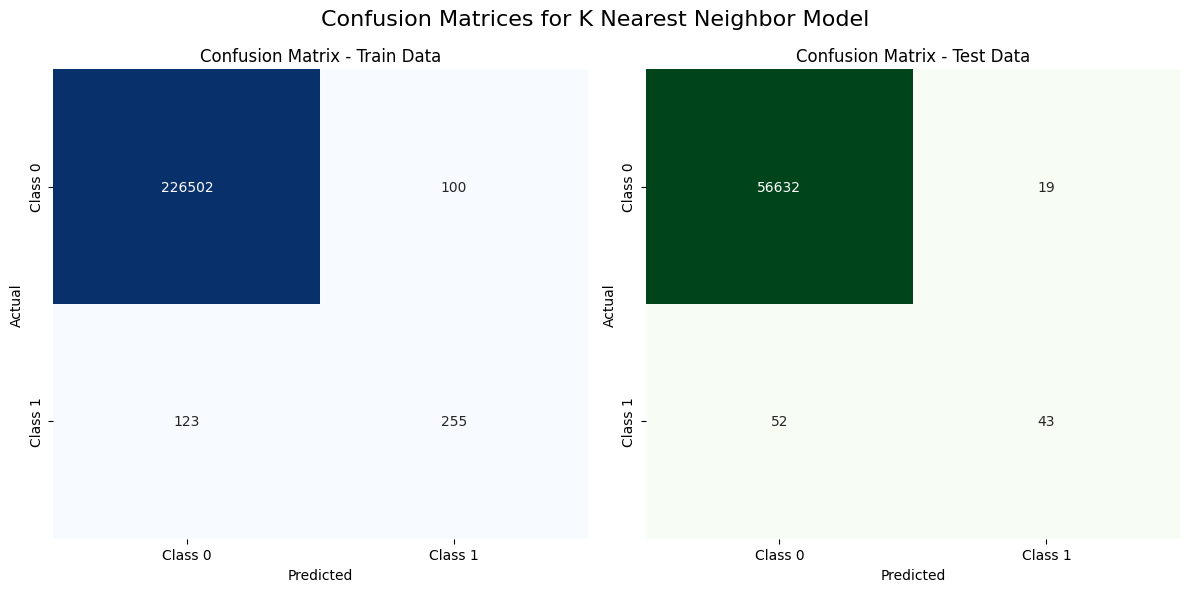

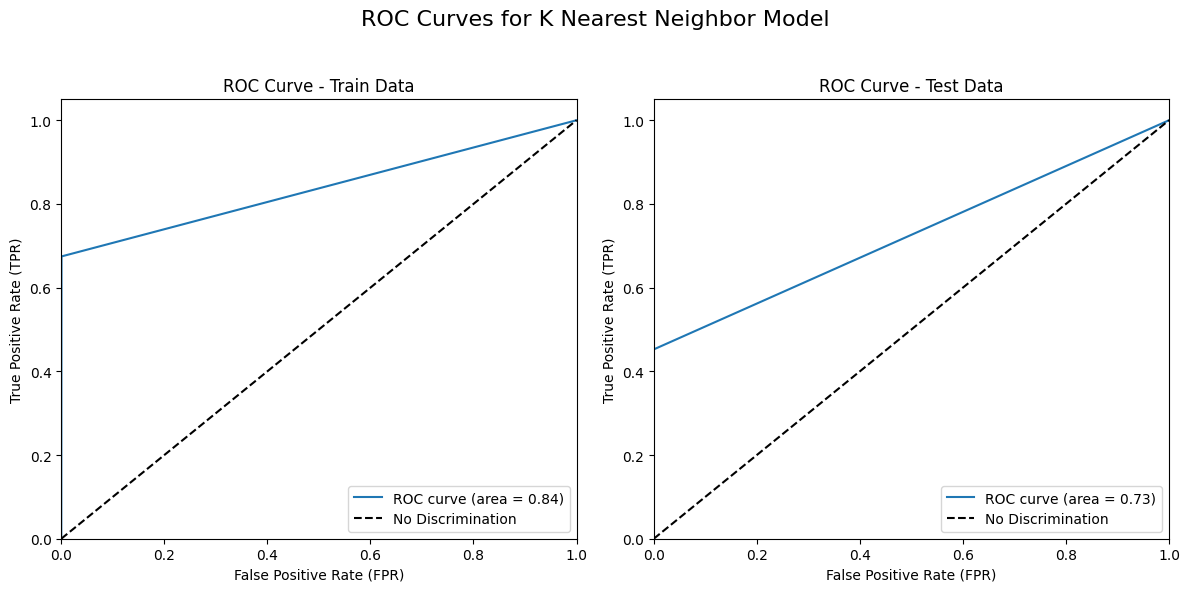

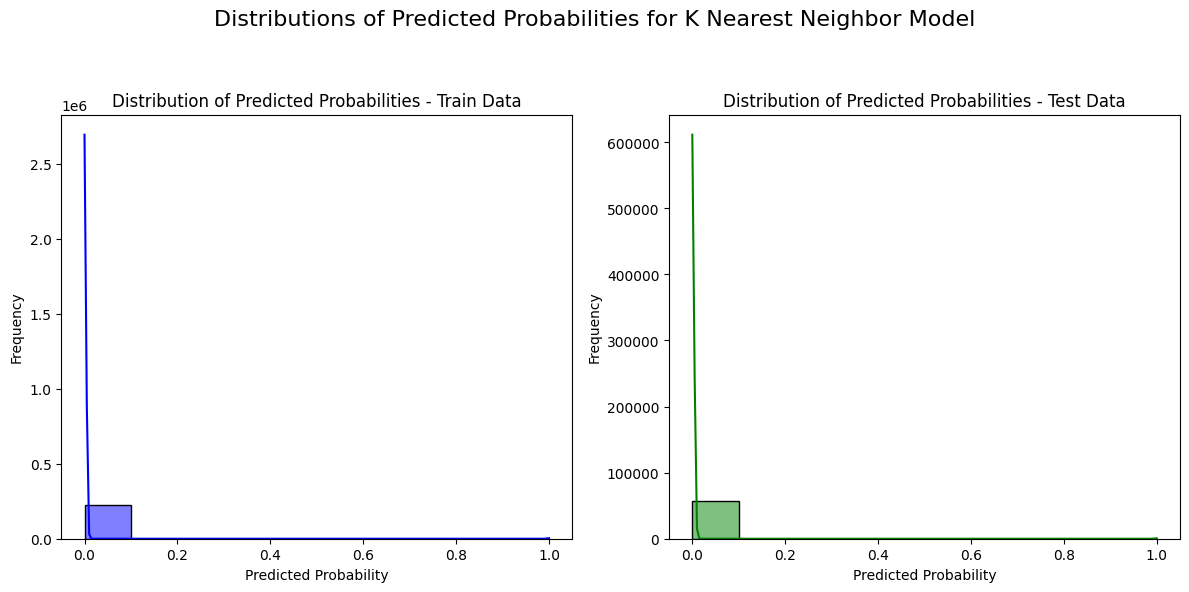

'{\n "LogisticRegression": {\n  "train": {\n   "accuracy": 0.9990175345845449,\n   "precision": 0.7183098591549296,\n   "recall": 0.6746031746031746\n  },\n  "test": {\n   "accuracy": 0.998748810488845,\n   "precision": 0.6935483870967742,\n   "recall": 0.45263157894736844\n  },\n  "sampling": "-"\n },\n "kNN": {\n  "train": {\n   "accuracy": 0.9990175345845449,\n   "precision": 0.7183098591549296,\n   "recall": 0.6746031746031746\n  },\n  "test": {\n   "accuracy": 0.998748810488845,\n   "precision": 0.6935483870967742,\n   "recall": 0.45263157894736844\n  },\n  "sampling": "-"\n }\n}'

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from utilties import print_comparision_result, show_result

knn_model = KNeighborsClassifier(n_neighbors = 5, metric="minkowski", p=2)

#training the model
start_time = time.time()
knn_model.fit(x_train, y_train)
end_time = time.time()
duration = end_time - start_time
print(f"Time taken to train the model:: {duration:.2f}")

start_time = time.time()
y_pred = knn_model.predict(x_train)
end_time = time.time()
duration = end_time - start_time
print(f"Time taken to predict on train data:: {duration:.2f}")

start_time = time.time()
y_pred = knn_model.predict(x_test)
end_time = time.time()
duration = end_time - start_time
print(f"Time taken to predict on test data:: {duration:.2f}")


comparison_results["kNN"] = show_result(y_train, y_train_pred, y_test, y_test_pred, labels,  "K Nearest Neighbor", "-")
print_comparision_result(comparison_results)



### Model 3 - Naive Bayes

Time taken to train the model:: 0.11
Time taken to predict on train data:: 0.11
Time taken to predict on test data:: 0.03
Train Accuracy: 1.00
Train Precision: 0.72
Train Recall: 0.67
Test Accuracy: 1.00
Test Precision: 0.69
Test Recall: 0.45


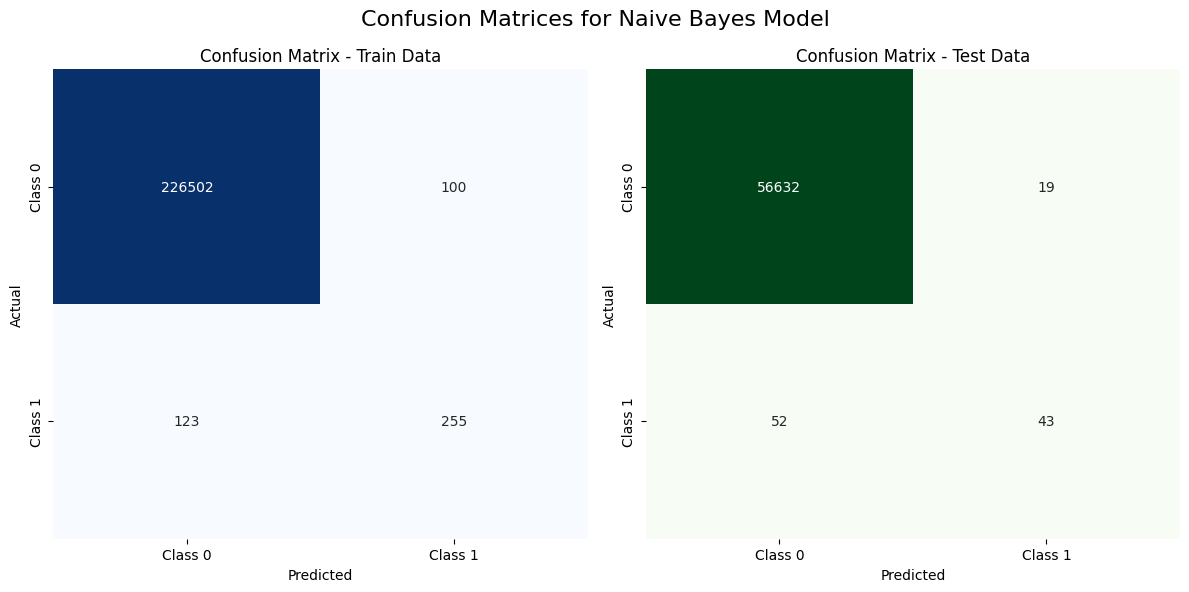

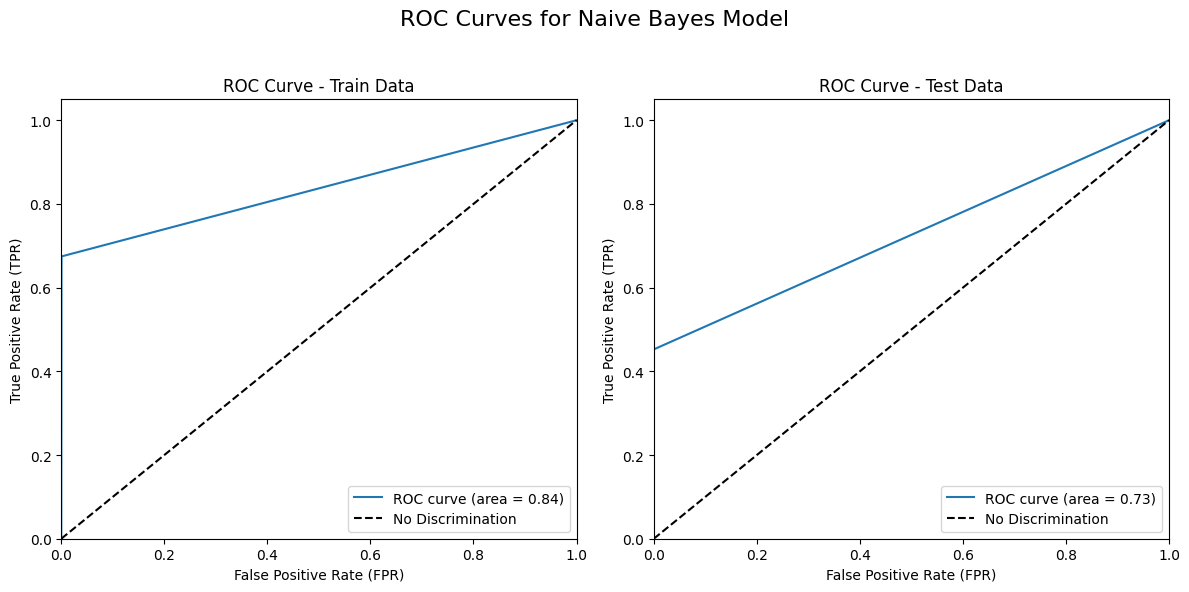

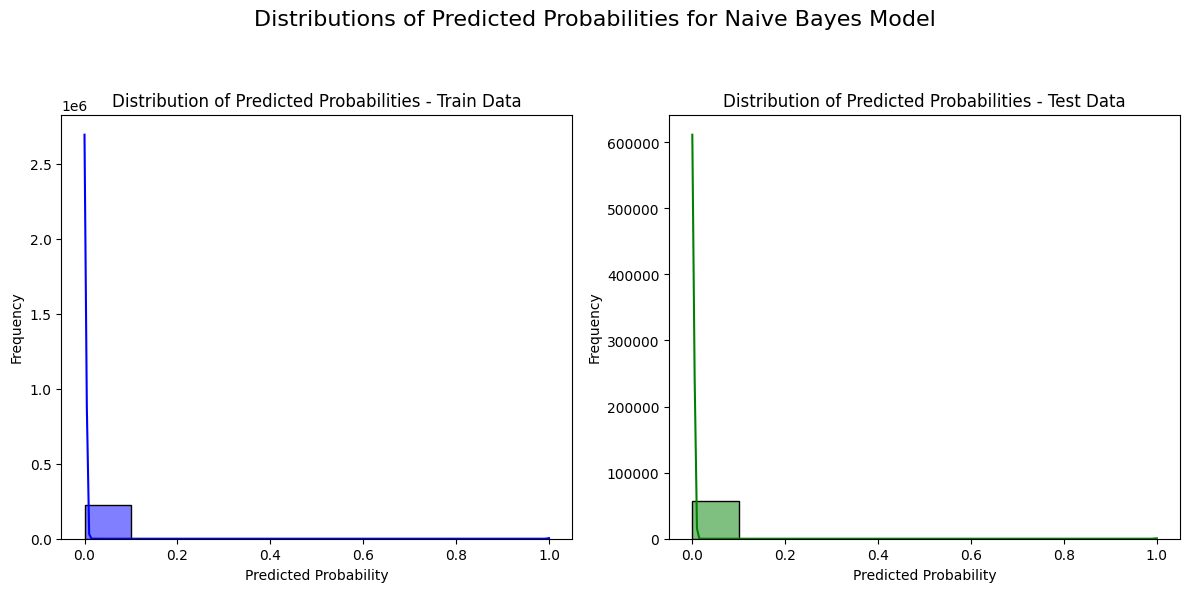

'{\n "LogisticRegression": {\n  "train": {\n   "accuracy": 0.9990175345845449,\n   "precision": 0.7183098591549296,\n   "recall": 0.6746031746031746\n  },\n  "test": {\n   "accuracy": 0.998748810488845,\n   "precision": 0.6935483870967742,\n   "recall": 0.45263157894736844\n  },\n  "sampling": "-"\n },\n "kNN": {\n  "train": {\n   "accuracy": 0.9990175345845449,\n   "precision": 0.7183098591549296,\n   "recall": 0.6746031746031746\n  },\n  "test": {\n   "accuracy": 0.998748810488845,\n   "precision": 0.6935483870967742,\n   "recall": 0.45263157894736844\n  },\n  "sampling": "-"\n },\n "NaiveBayes": {\n  "train": {\n   "accuracy": 0.9990175345845449,\n   "precision": 0.7183098591549296,\n   "recall": 0.6746031746031746\n  },\n  "test": {\n   "accuracy": 0.998748810488845,\n   "precision": 0.6935483870967742,\n   "recall": 0.45263157894736844\n  },\n  "sampling": "-"\n }\n}'

In [14]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()

#training the model
start_time = time.time()
nb_model.fit(x_train, y_train)
end_time = time.time()
duration = end_time - start_time
print(f"Time taken to train the model:: {duration:.2f}")

start_time = time.time()
y_pred = nb_model.predict(x_train)
end_time = time.time()
duration = end_time - start_time
print(f"Time taken to predict on train data:: {duration:.2f}")

start_time = time.time()
y_pred = nb_model.predict(x_test)
end_time = time.time()
duration = end_time - start_time
print(f"Time taken to predict on test data:: {duration:.2f}")


comparison_results["NaiveBayes"] = show_result(y_train, y_train_pred, y_test, y_test_pred, labels,  "Naive Bayes", "-")
print_comparision_result(comparison_results)




### Model 4 - Decision Tree

Time taken to train the model:: 9.53
Time taken to predict on train data:: 0.03
Time taken to predict on test data:: 0.00
Train Accuracy: 1.00
Train Precision: 0.72
Train Recall: 0.67
Test Accuracy: 1.00
Test Precision: 0.69
Test Recall: 0.45


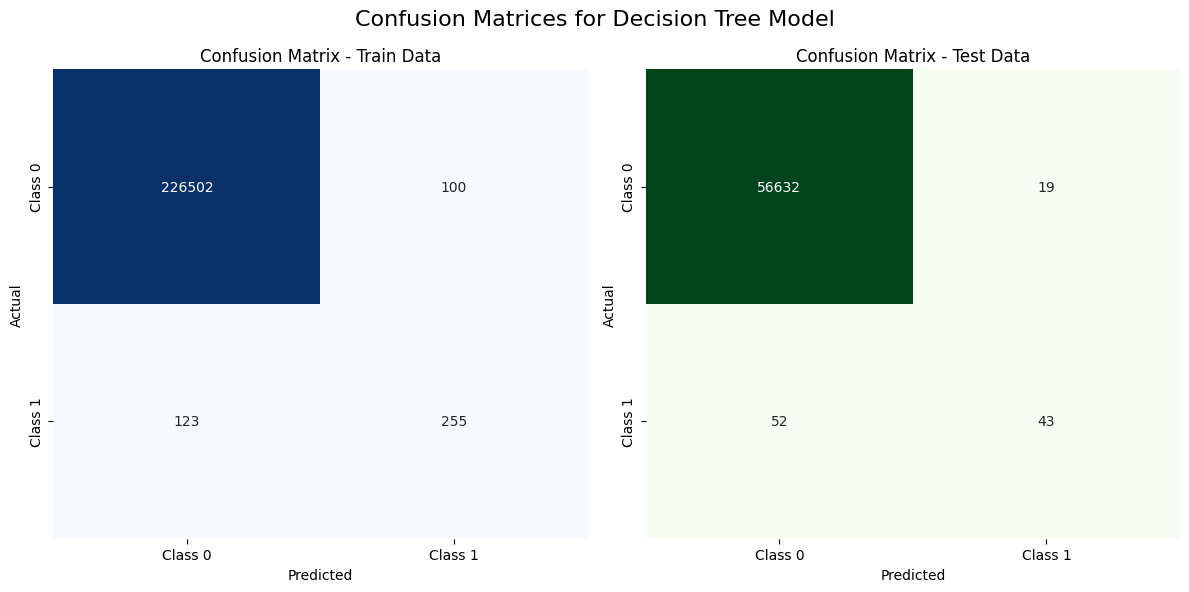

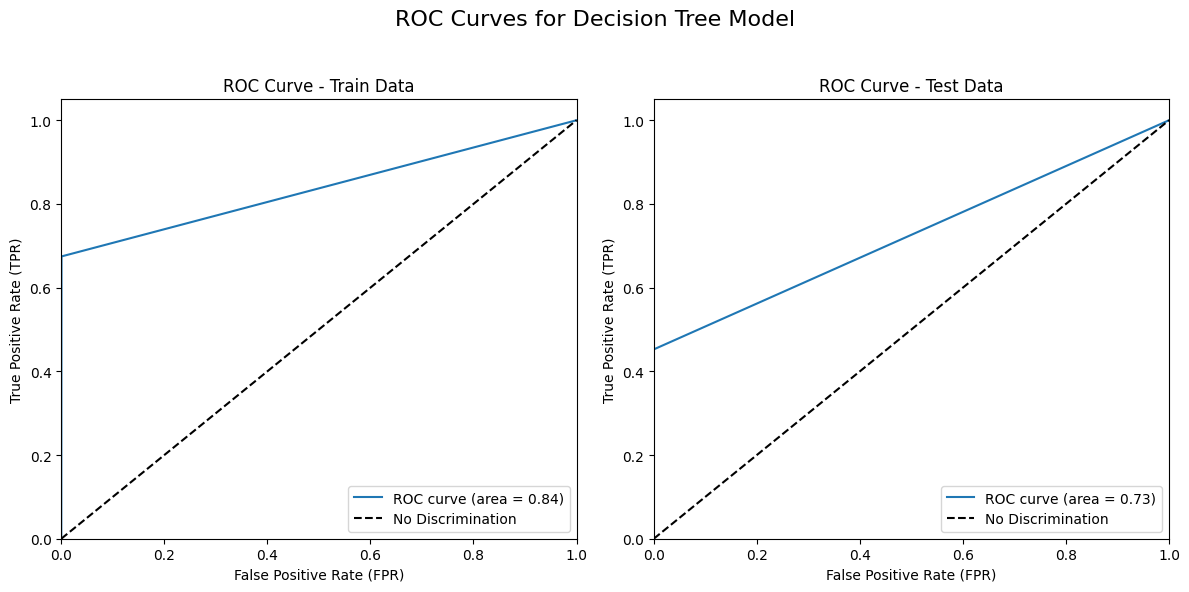

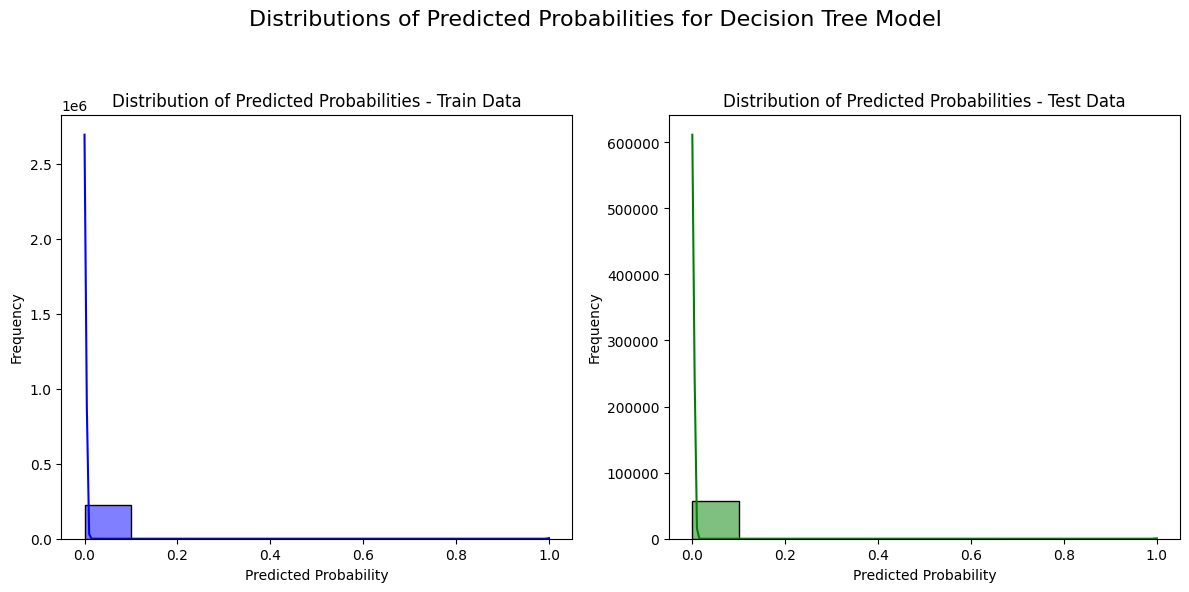

'{\n "LogisticRegression": {\n  "train": {\n   "accuracy": 0.9990175345845449,\n   "precision": 0.7183098591549296,\n   "recall": 0.6746031746031746\n  },\n  "test": {\n   "accuracy": 0.998748810488845,\n   "precision": 0.6935483870967742,\n   "recall": 0.45263157894736844\n  },\n  "sampling": "-"\n },\n "kNN": {\n  "train": {\n   "accuracy": 0.9990175345845449,\n   "precision": 0.7183098591549296,\n   "recall": 0.6746031746031746\n  },\n  "test": {\n   "accuracy": 0.998748810488845,\n   "precision": 0.6935483870967742,\n   "recall": 0.45263157894736844\n  },\n  "sampling": "-"\n },\n "NaiveBayes": {\n  "train": {\n   "accuracy": 0.9990175345845449,\n   "precision": 0.7183098591549296,\n   "recall": 0.6746031746031746\n  },\n  "test": {\n   "accuracy": 0.998748810488845,\n   "precision": 0.6935483870967742,\n   "recall": 0.45263157894736844\n  },\n  "sampling": "-"\n },\n "DecisionTree": {\n  "train": {\n   "accuracy": 0.9990175345845449,\n   "precision": 0.7183098591549296,\n   "recal

In [15]:
from sklearn.tree import DecisionTreeClassifier
dtmodel = DecisionTreeClassifier(criterion="entropy")

#training the model
start_time = time.time()
dtmodel.fit(x_train, y_train)
end_time = time.time()
duration = end_time - start_time
print(f"Time taken to train the model:: {duration:.2f}")

start_time = time.time()
y_pred = dtmodel.predict(x_train)
end_time = time.time()
duration = end_time - start_time
print(f"Time taken to predict on train data:: {duration:.2f}")

start_time = time.time()
y_pred = dtmodel.predict(x_test)
end_time = time.time()
duration = end_time - start_time
print(f"Time taken to predict on test data:: {duration:.2f}")


comparison_results["DecisionTree"] = show_result(y_train, y_train_pred, y_test, y_test_pred, labels,  "Decision Tree", "-")
print_comparision_result(comparison_results)




### Model 5. Random Forest

Time taken to train the model:: 125.38
Time taken to predict on train data:: 0.93
Time taken to predict on test data:: 0.22
Train Accuracy: 1.00
Train Precision: 0.72
Train Recall: 0.67
Test Accuracy: 1.00
Test Precision: 0.69
Test Recall: 0.45


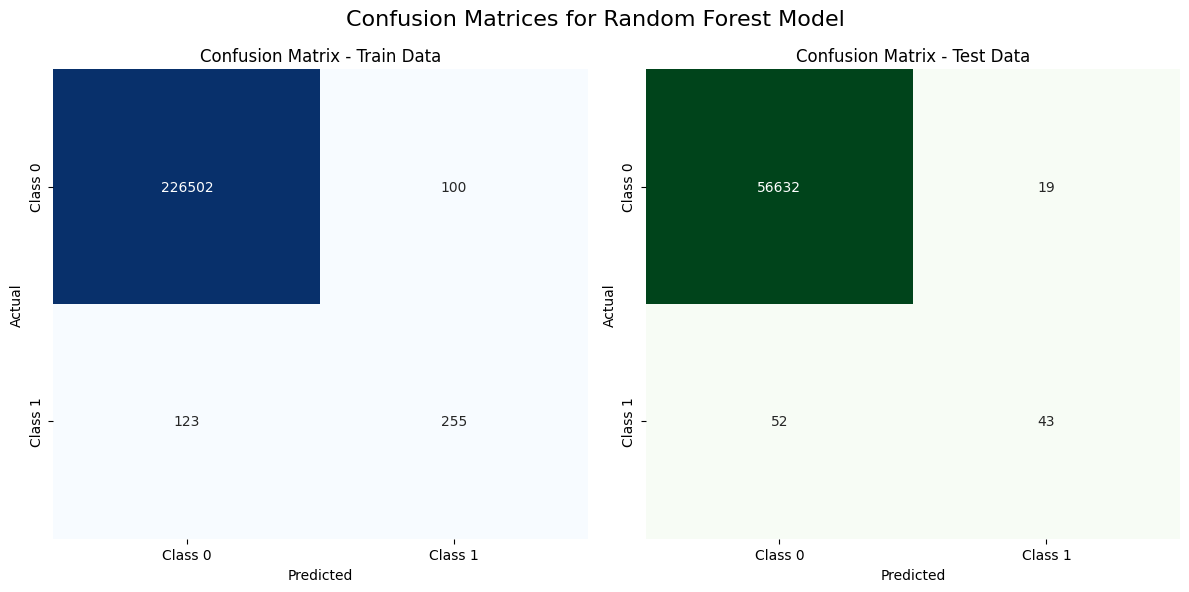

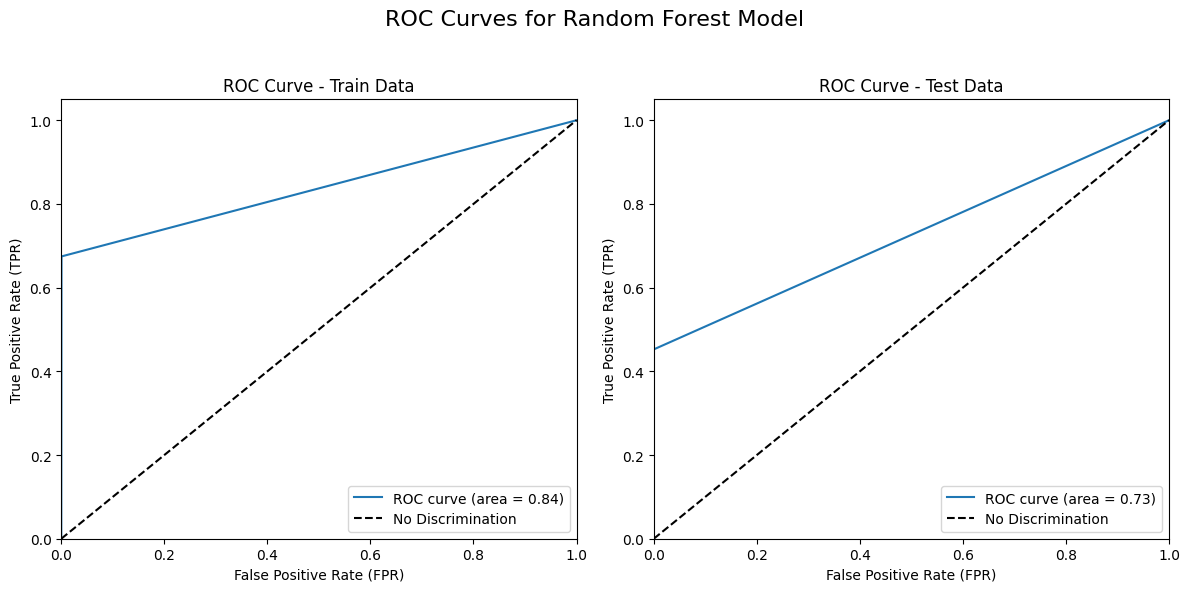

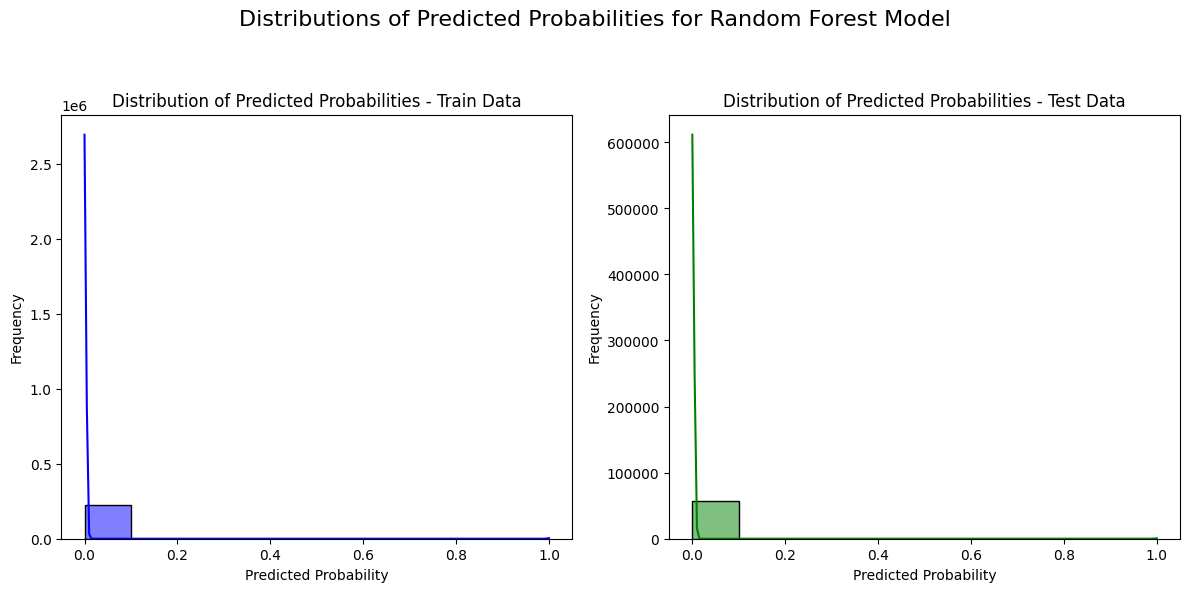

'{\n "LogisticRegression": {\n  "train": {\n   "accuracy": 0.9990175345845449,\n   "precision": 0.7183098591549296,\n   "recall": 0.6746031746031746\n  },\n  "test": {\n   "accuracy": 0.998748810488845,\n   "precision": 0.6935483870967742,\n   "recall": 0.45263157894736844\n  },\n  "sampling": "-"\n },\n "kNN": {\n  "train": {\n   "accuracy": 0.9990175345845449,\n   "precision": 0.7183098591549296,\n   "recall": 0.6746031746031746\n  },\n  "test": {\n   "accuracy": 0.998748810488845,\n   "precision": 0.6935483870967742,\n   "recall": 0.45263157894736844\n  },\n  "sampling": "-"\n },\n "NaiveBayes": {\n  "train": {\n   "accuracy": 0.9990175345845449,\n   "precision": 0.7183098591549296,\n   "recall": 0.6746031746031746\n  },\n  "test": {\n   "accuracy": 0.998748810488845,\n   "precision": 0.6935483870967742,\n   "recall": 0.45263157894736844\n  },\n  "sampling": "-"\n },\n "DecisionTree": {\n  "train": {\n   "accuracy": 0.9990175345845449,\n   "precision": 0.7183098591549296,\n   "recal

In [16]:
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier(criterion = 'entropy')

#training the model
start_time = time.time()
rfc_model.fit(x_train, y_train)
end_time = time.time()
duration = end_time - start_time
print(f"Time taken to train the model:: {duration:.2f}")

start_time = time.time()
y_pred = rfc_model.predict(x_train)
end_time = time.time()
duration = end_time - start_time
print(f"Time taken to predict on train data:: {duration:.2f}")

start_time = time.time()
y_pred = rfc_model.predict(x_test)
end_time = time.time()
duration = end_time - start_time
print(f"Time taken to predict on test data:: {duration:.2f}")


comparison_results["RandomForest"] = show_result(y_train, y_train_pred, y_test, y_test_pred, labels,  "Random Forest", "-")
print_comparision_result(comparison_results)





### Model 1 - Sigmoid - Support Vector Machine(SVM)

Time taken to train the model:: 21.96
Time taken to predict on train data:: 4.96
Time taken to predict on test data:: 1.21
Train Accuracy: 1.00
Train Precision: 0.00
Train Recall: 0.00
Test Accuracy: 1.00
Test Precision: 0.00
Test Recall: 0.00


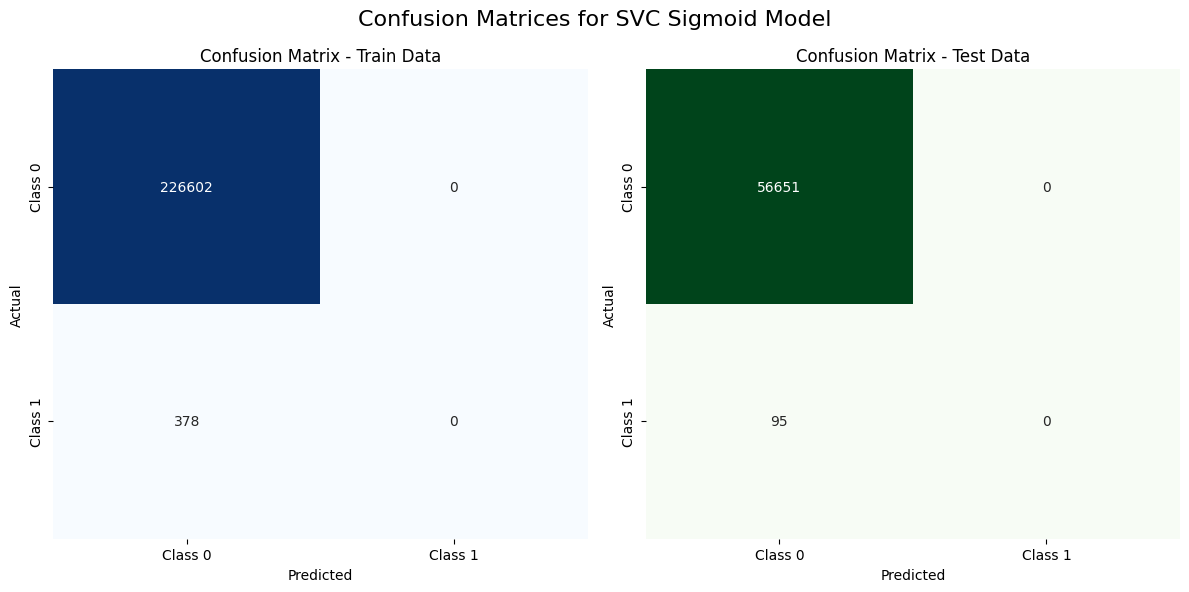

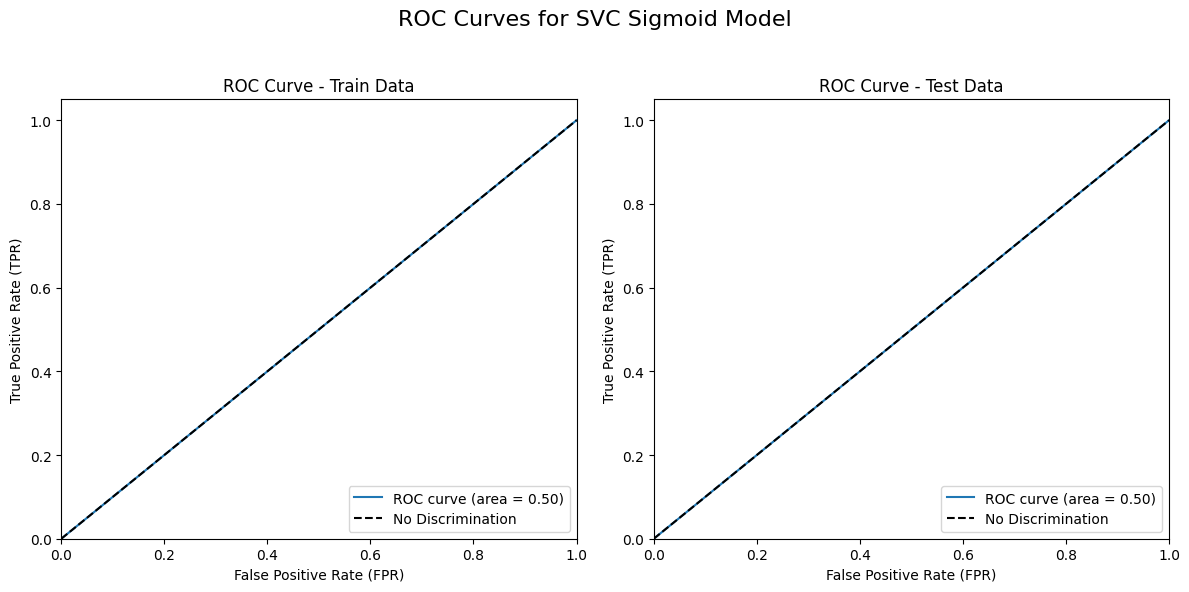

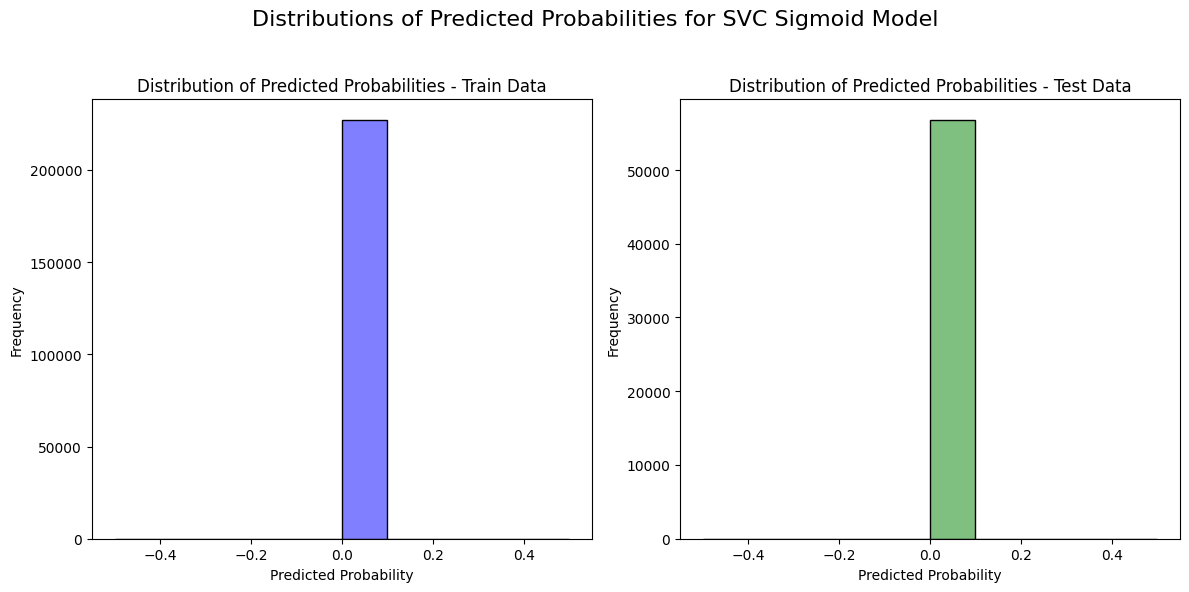

'{\n "LogisticRegression": {\n  "train": {\n   "accuracy": 0.9990175345845449,\n   "precision": 0.7183098591549296,\n   "recall": 0.6746031746031746\n  },\n  "test": {\n   "accuracy": 0.998748810488845,\n   "precision": 0.6935483870967742,\n   "recall": 0.45263157894736844\n  },\n  "sampling": "-"\n },\n "kNN": {\n  "train": {\n   "accuracy": 0.9990175345845449,\n   "precision": 0.7183098591549296,\n   "recall": 0.6746031746031746\n  },\n  "test": {\n   "accuracy": 0.998748810488845,\n   "precision": 0.6935483870967742,\n   "recall": 0.45263157894736844\n  },\n  "sampling": "-"\n },\n "NaiveBayes": {\n  "train": {\n   "accuracy": 0.9990175345845449,\n   "precision": 0.7183098591549296,\n   "recall": 0.6746031746031746\n  },\n  "test": {\n   "accuracy": 0.998748810488845,\n   "precision": 0.6935483870967742,\n   "recall": 0.45263157894736844\n  },\n  "sampling": "-"\n },\n "DecisionTree": {\n  "train": {\n   "accuracy": 0.9990175345845449,\n   "precision": 0.7183098591549296,\n   "recal

In [17]:
from sklearn.svm import SVC
#gc.collect()
svm_model_sigmoid = SVC(kernel = 'sigmoid')

#training the model
start_time = time.time()
svm_model_sigmoid.fit(x_train, y_train)
end_time = time.time()
duration = end_time - start_time
print(f"Time taken to train the model:: {duration:.2f}")

start_time = time.time()
y_train_pred = svm_model_sigmoid.predict(x_train)
end_time = time.time()
duration = end_time - start_time
print(f"Time taken to predict on train data:: {duration:.2f}")

start_time = time.time()
y_test_pred = svm_model_sigmoid.predict(x_test)
end_time = time.time()
duration = end_time - start_time
print(f"Time taken to predict on test data:: {duration:.2f}")


comparison_results["SVC_Sigmoid"] = show_result(y_train, y_train_pred, y_test, y_test_pred, labels,  "SVC Sigmoid", "-")
print_comparision_result(comparison_results)


### Model 2. Linear - SVM

Time taken to train the model:: 317.06
Time taken to predict on train data:: 2.10
Time taken to predict on test data:: 0.51
Train Accuracy: 1.00
Train Precision: 0.70
Train Recall: 0.35
Test Accuracy: 1.00
Test Precision: 0.58
Test Recall: 0.22


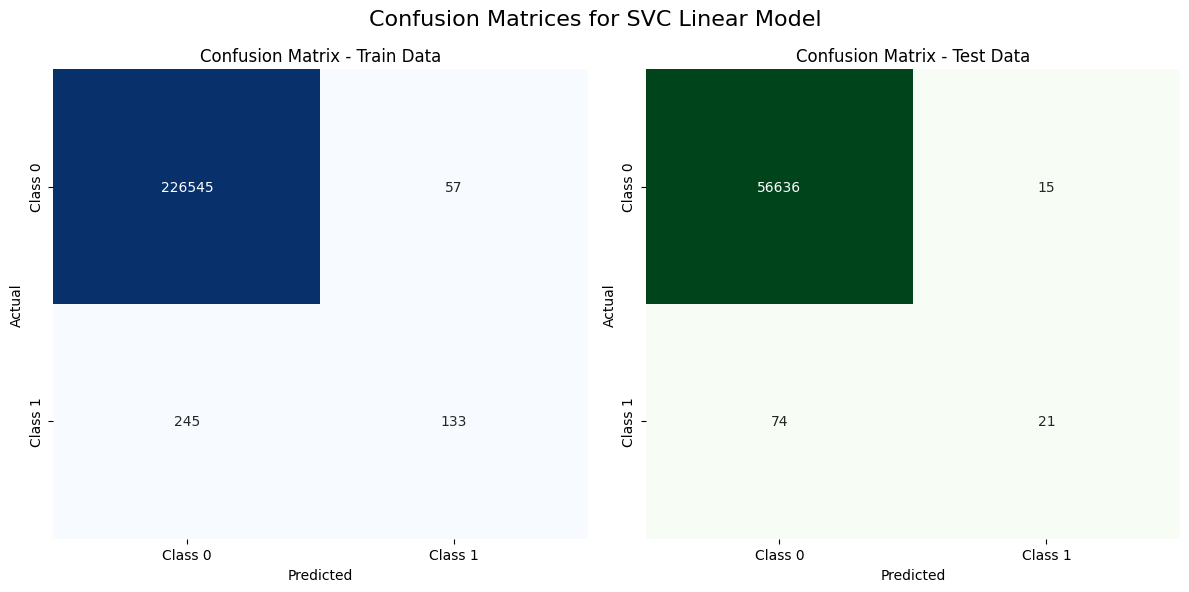

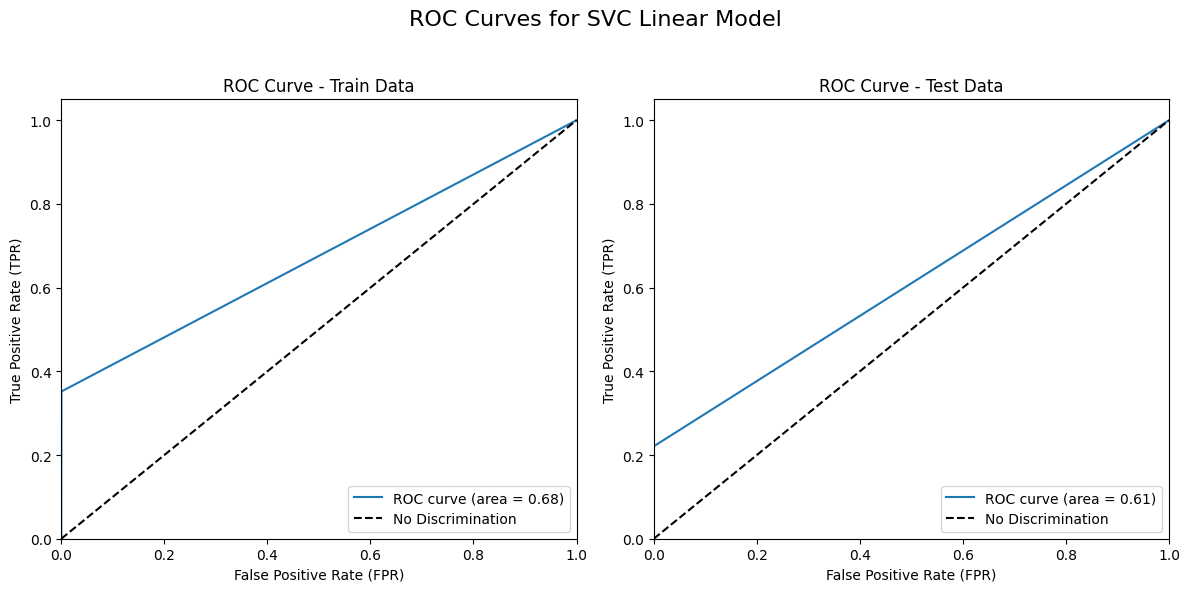

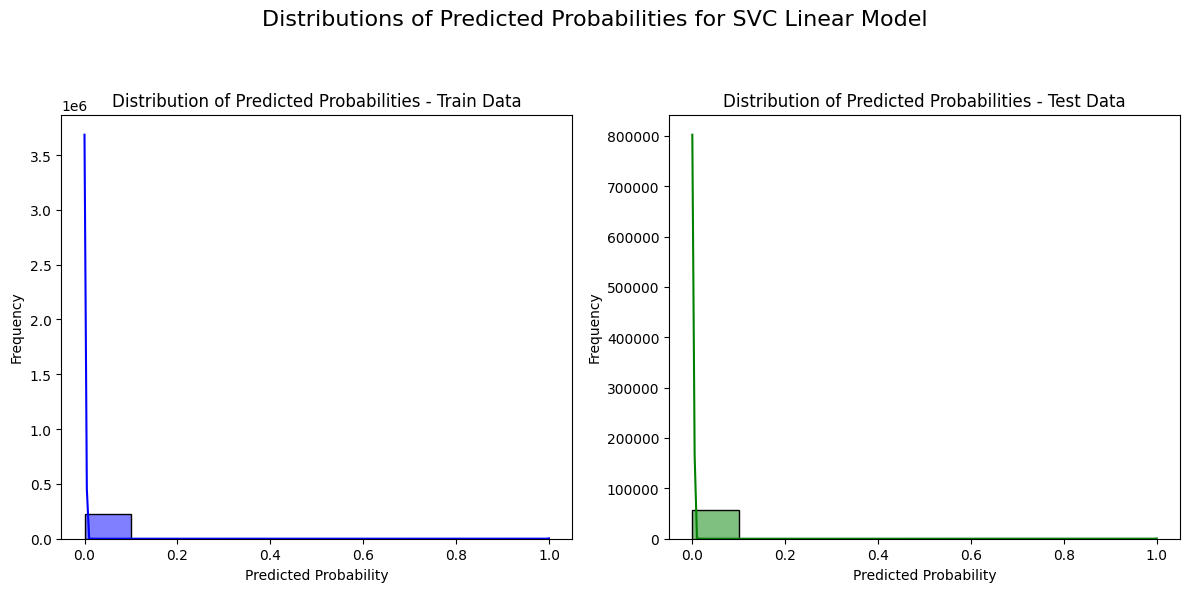

'{\n "LogisticRegression": {\n  "train": {\n   "accuracy": 0.9990175345845449,\n   "precision": 0.7183098591549296,\n   "recall": 0.6746031746031746\n  },\n  "test": {\n   "accuracy": 0.998748810488845,\n   "precision": 0.6935483870967742,\n   "recall": 0.45263157894736844\n  },\n  "sampling": "-"\n },\n "kNN": {\n  "train": {\n   "accuracy": 0.9990175345845449,\n   "precision": 0.7183098591549296,\n   "recall": 0.6746031746031746\n  },\n  "test": {\n   "accuracy": 0.998748810488845,\n   "precision": 0.6935483870967742,\n   "recall": 0.45263157894736844\n  },\n  "sampling": "-"\n },\n "NaiveBayes": {\n  "train": {\n   "accuracy": 0.9990175345845449,\n   "precision": 0.7183098591549296,\n   "recall": 0.6746031746031746\n  },\n  "test": {\n   "accuracy": 0.998748810488845,\n   "precision": 0.6935483870967742,\n   "recall": 0.45263157894736844\n  },\n  "sampling": "-"\n },\n "DecisionTree": {\n  "train": {\n   "accuracy": 0.9990175345845449,\n   "precision": 0.7183098591549296,\n   "recal

In [18]:
from sklearn.svm import SVC

svm_model_linear = SVC(kernel="linear")

#training the model
start_time = time.time()
svm_model_linear.fit(x_train, y_train)
end_time = time.time()
duration = end_time - start_time
print(f"Time taken to train the model:: {duration:.2f}")

start_time = time.time()
y_train_pred = svm_model_linear.predict(x_train)
end_time = time.time()
duration = end_time - start_time
print(f"Time taken to predict on train data:: {duration:.2f}")

start_time = time.time()
y_test_pred = svm_model_linear.predict(x_test)
end_time = time.time()
duration = end_time - start_time
print(f"Time taken to predict on test data:: {duration:.2f}")


comparison_results["SVC_Linear"] = show_result(y_train, y_train_pred, y_test, y_test_pred, labels,  "SVC Linear", "-")
print_comparision_result(comparison_results)


### Model 3. Poly - SVM

Time taken to train the model:: 5.43
Time taken to predict on train data:: 3.35
Time taken to predict on test data:: 0.81
Train Accuracy: 1.00
Train Precision: 0.00
Train Recall: 0.00
Test Accuracy: 1.00
Test Precision: 0.00
Test Recall: 0.00


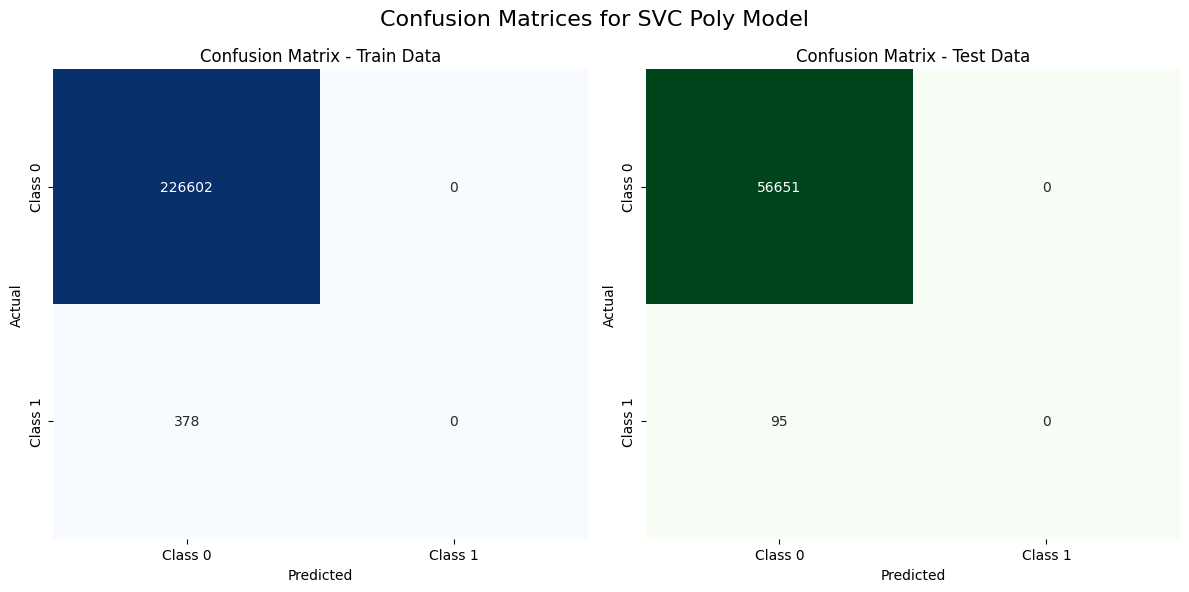

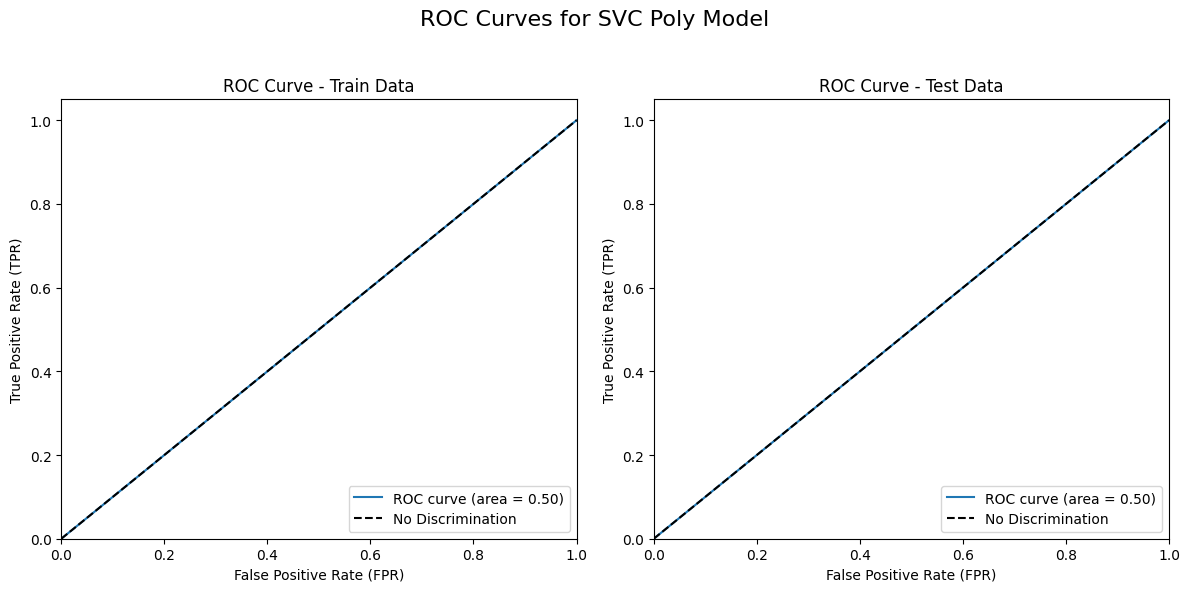

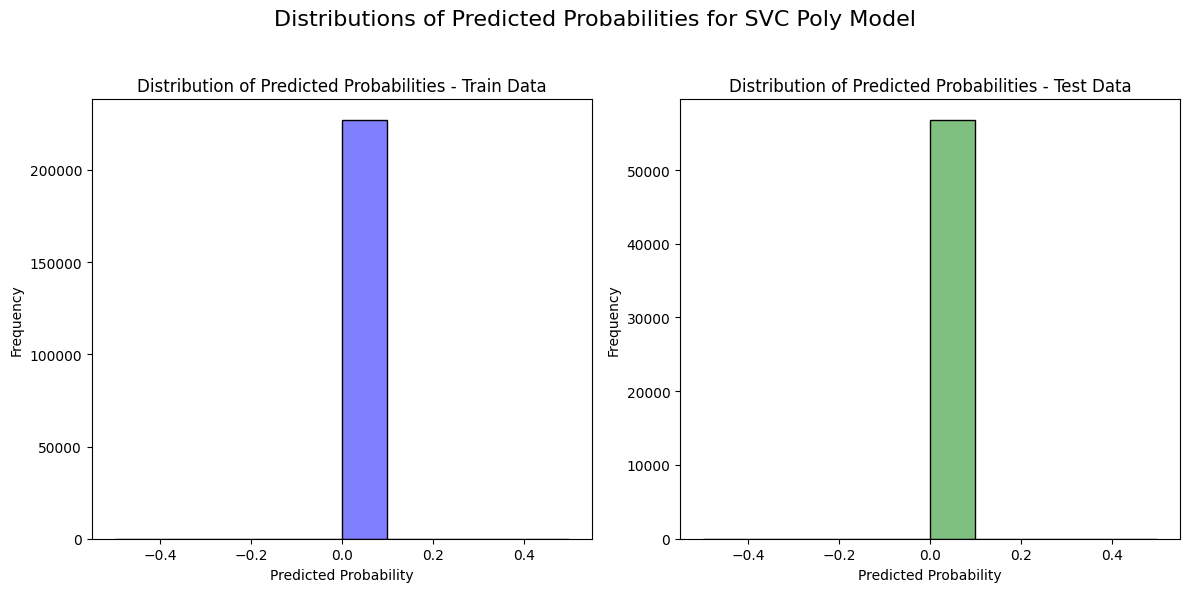

'{\n "LogisticRegression": {\n  "train": {\n   "accuracy": 0.9990175345845449,\n   "precision": 0.7183098591549296,\n   "recall": 0.6746031746031746\n  },\n  "test": {\n   "accuracy": 0.998748810488845,\n   "precision": 0.6935483870967742,\n   "recall": 0.45263157894736844\n  },\n  "sampling": "-"\n },\n "kNN": {\n  "train": {\n   "accuracy": 0.9990175345845449,\n   "precision": 0.7183098591549296,\n   "recall": 0.6746031746031746\n  },\n  "test": {\n   "accuracy": 0.998748810488845,\n   "precision": 0.6935483870967742,\n   "recall": 0.45263157894736844\n  },\n  "sampling": "-"\n },\n "NaiveBayes": {\n  "train": {\n   "accuracy": 0.9990175345845449,\n   "precision": 0.7183098591549296,\n   "recall": 0.6746031746031746\n  },\n  "test": {\n   "accuracy": 0.998748810488845,\n   "precision": 0.6935483870967742,\n   "recall": 0.45263157894736844\n  },\n  "sampling": "-"\n },\n "DecisionTree": {\n  "train": {\n   "accuracy": 0.9990175345845449,\n   "precision": 0.7183098591549296,\n   "recal

In [19]:
svm_model_poly = SVC(kernel='poly')

#training the model
start_time = time.time()
svm_model_poly.fit(x_train, y_train)
end_time = time.time()
duration = end_time - start_time
print(f"Time taken to train the model:: {duration:.2f}")

start_time = time.time()
y_train_pred = svm_model_poly.predict(x_train)
end_time = time.time()
duration = end_time - start_time
print(f"Time taken to predict on train data:: {duration:.2f}")

start_time = time.time()
y_test_pred = svm_model_poly.predict(x_test)
end_time = time.time()
duration = end_time - start_time
print(f"Time taken to predict on test data:: {duration:.2f}")


comparison_results["SVC_Poly"] = show_result(y_train, y_train_pred, y_test, y_test_pred, labels,  "SVC Poly", "-")
print_comparision_result(comparison_results)


## 4. RBF - SVM

Time taken to train the model:: 7.50
Time taken to predict on train data:: 15.80
Time taken to predict on test data:: 3.98
Train Accuracy: 1.00
Train Precision: 0.00
Train Recall: 0.00
Test Accuracy: 1.00
Test Precision: 0.00
Test Recall: 0.00


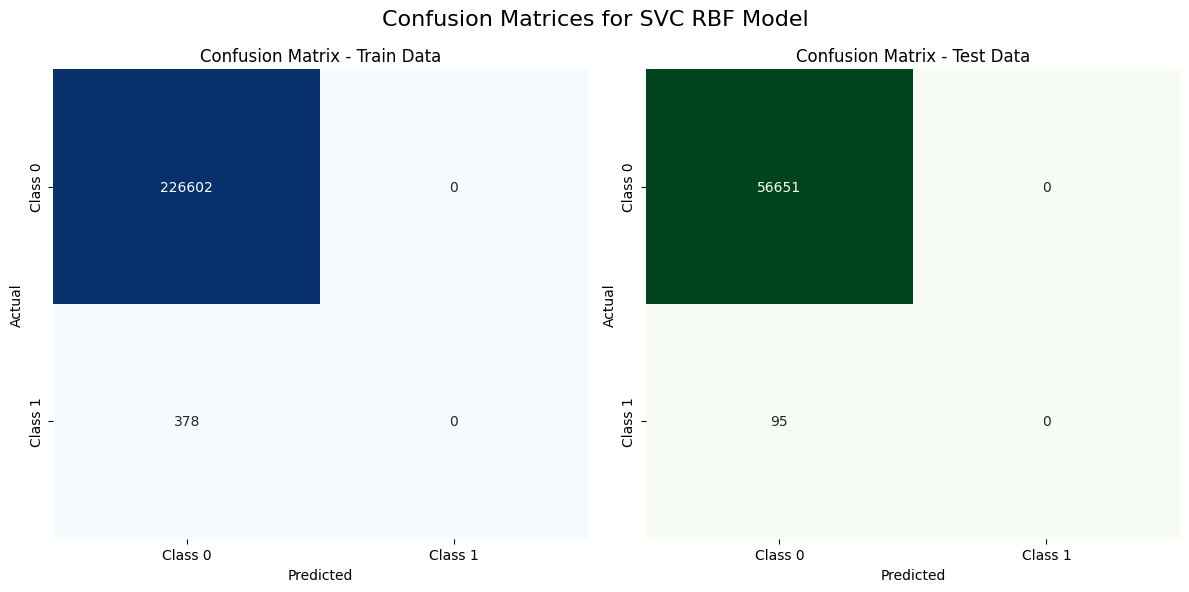

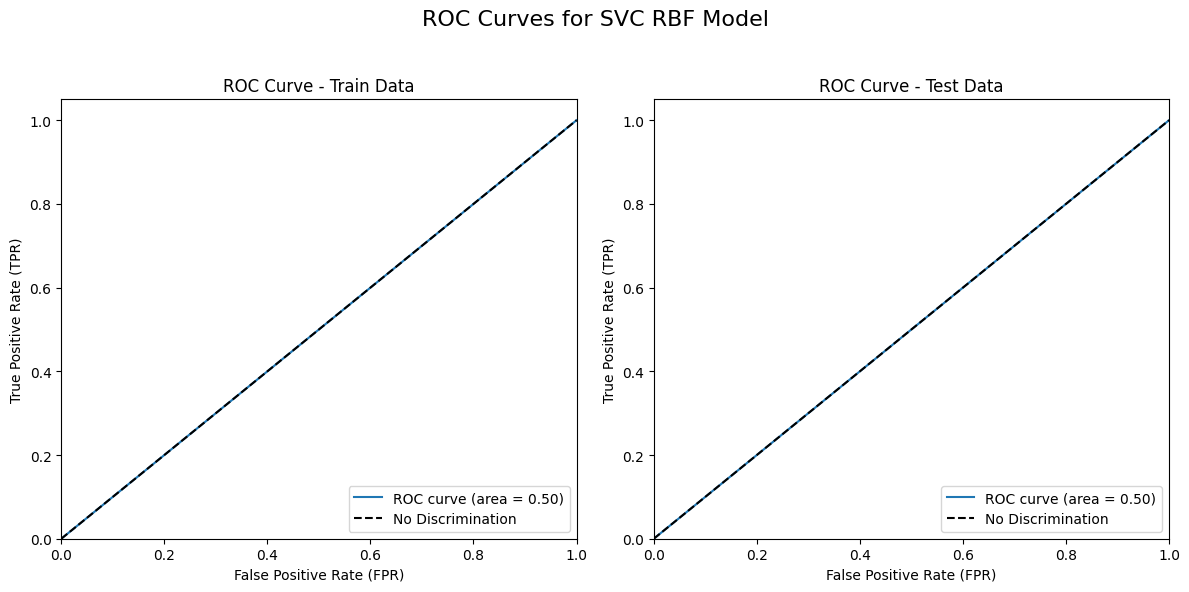

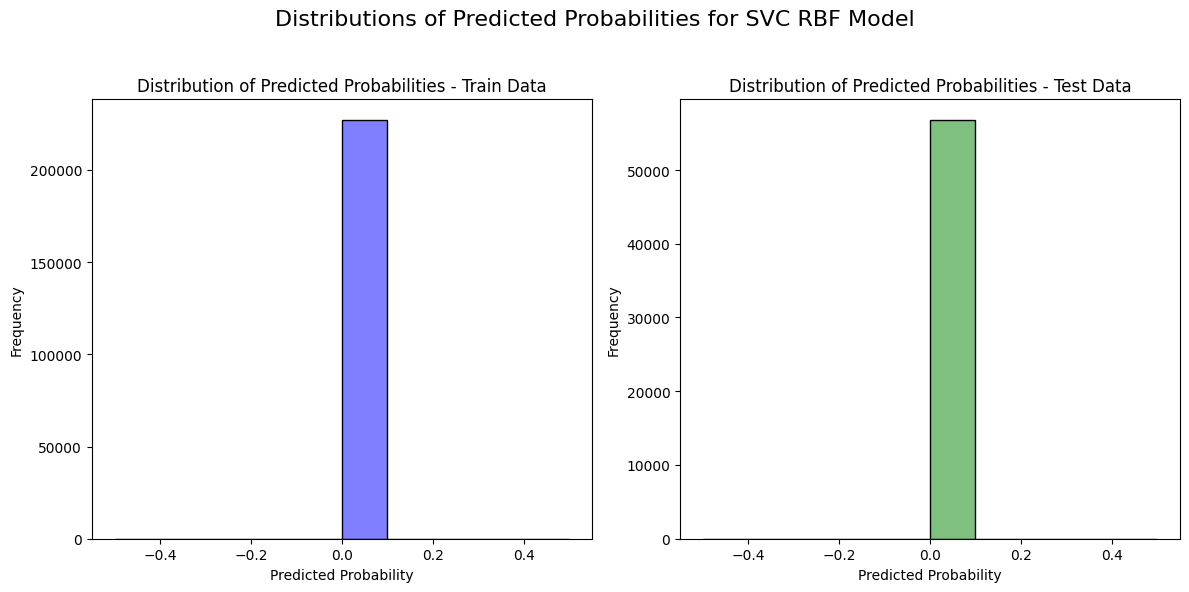

'{\n "LogisticRegression": {\n  "train": {\n   "accuracy": 0.9990175345845449,\n   "precision": 0.7183098591549296,\n   "recall": 0.6746031746031746\n  },\n  "test": {\n   "accuracy": 0.998748810488845,\n   "precision": 0.6935483870967742,\n   "recall": 0.45263157894736844\n  },\n  "sampling": "-"\n },\n "kNN": {\n  "train": {\n   "accuracy": 0.9990175345845449,\n   "precision": 0.7183098591549296,\n   "recall": 0.6746031746031746\n  },\n  "test": {\n   "accuracy": 0.998748810488845,\n   "precision": 0.6935483870967742,\n   "recall": 0.45263157894736844\n  },\n  "sampling": "-"\n },\n "NaiveBayes": {\n  "train": {\n   "accuracy": 0.9990175345845449,\n   "precision": 0.7183098591549296,\n   "recall": 0.6746031746031746\n  },\n  "test": {\n   "accuracy": 0.998748810488845,\n   "precision": 0.6935483870967742,\n   "recall": 0.45263157894736844\n  },\n  "sampling": "-"\n },\n "DecisionTree": {\n  "train": {\n   "accuracy": 0.9990175345845449,\n   "precision": 0.7183098591549296,\n   "recal

In [20]:
svm_model_rbf = SVC(kernel='rbf')

#training the model
start_time = time.time()
svm_model_rbf.fit(x_train, y_train)
end_time = time.time()
duration = end_time - start_time
print(f"Time taken to train the model:: {duration:.2f}")

start_time = time.time()
y_train_pred = svm_model_rbf.predict(x_train)
end_time = time.time()
duration = end_time - start_time
print(f"Time taken to predict on train data:: {duration:.2f}")

start_time = time.time()
y_test_pred = svm_model_rbf.predict(x_test)
end_time = time.time()
duration = end_time - start_time
print(f"Time taken to predict on test data:: {duration:.2f}")


comparison_results["SVC_RBF"] = show_result(y_train, y_train_pred, y_test, y_test_pred, labels,  "SVC RBF", "-")
print_comparision_result(comparison_results)


# 5. Conclusion

In [36]:
# import pickle
# file_name = "sharedfile"
# pickle.dump(comparison_results, open(file_name, "wb"))
# %store comparison_results 
# x =  'my data'
# %store x
# #x is a variable to share
# # Convert the dictionary to a Pandas DataFrame
# df = pd.DataFrame(comparison_results).transpose()  # Transpose for better table view

# # Print the table
# print(df)

# # Create a bar chart for accuracy
# plt.figure(figsize=(12, 3))
# plt.bar(df.index, df["accuracy"])
# plt.xlabel("Model Name")
# plt.ylabel("Accuracy")
# plt.title("Balanced/Normalized Dataset without FeatureSelection")
# plt.show()

# #%store

In [21]:
EXPORT_FILENAME= 'comparison_results_without_normalization.csv'

print(comparison_results)
# Convert the dictionary to a Pandas DataFrame
df = pd.DataFrame(comparison_results).transpose()  # Transpose for better table view

# Print the table
print(df)


# Flatten the dictionary
# Create a new list to store the flattened data
flattened_data = []

# Flatten the dictionary
for model, metrics in comparison_results.items():
    flattened_data.append({
        'Model': model,
        'train-accuracy': metrics['train']['accuracy'],
        'test-accuracy': metrics['test']['accuracy'],
        'train-precision': metrics['train']['precision'],
        'test-precision': metrics['test']['precision'],
        'train-recall': metrics['train']['recall'],
        'test-recall': metrics['test']['recall'],
        'sampling': metrics['sampling']
    })

# Convert the flattened data to a DataFrame
df_flattened = pd.DataFrame(flattened_data)

# Save the DataFrame to a CSV file
df_flattened.to_csv(EXPORT_FILENAME, index=False)

# Print the DataFrame
print(df_flattened)

df_flattened['Model']


{'LogisticRegression': {'train': {'accuracy': 0.9990175345845449, 'precision': 0.7183098591549296, 'recall': 0.6746031746031746}, 'test': {'accuracy': 0.998748810488845, 'precision': 0.6935483870967742, 'recall': 0.45263157894736844}, 'sampling': '-'}, 'kNN': {'train': {'accuracy': 0.9990175345845449, 'precision': 0.7183098591549296, 'recall': 0.6746031746031746}, 'test': {'accuracy': 0.998748810488845, 'precision': 0.6935483870967742, 'recall': 0.45263157894736844}, 'sampling': '-'}, 'NaiveBayes': {'train': {'accuracy': 0.9990175345845449, 'precision': 0.7183098591549296, 'recall': 0.6746031746031746}, 'test': {'accuracy': 0.998748810488845, 'precision': 0.6935483870967742, 'recall': 0.45263157894736844}, 'sampling': '-'}, 'DecisionTree': {'train': {'accuracy': 0.9990175345845449, 'precision': 0.7183098591549296, 'recall': 0.6746031746031746}, 'test': {'accuracy': 0.998748810488845, 'precision': 0.6935483870967742, 'recall': 0.45263157894736844}, 'sampling': '-'}, 'RandomForest': {'tr

0    LogisticRegression
1                   kNN
2            NaiveBayes
3          DecisionTree
4          RandomForest
5           SVC_Sigmoid
6            SVC_Linear
7              SVC_Poly
8               SVC_RBF
Name: Model, dtype: object

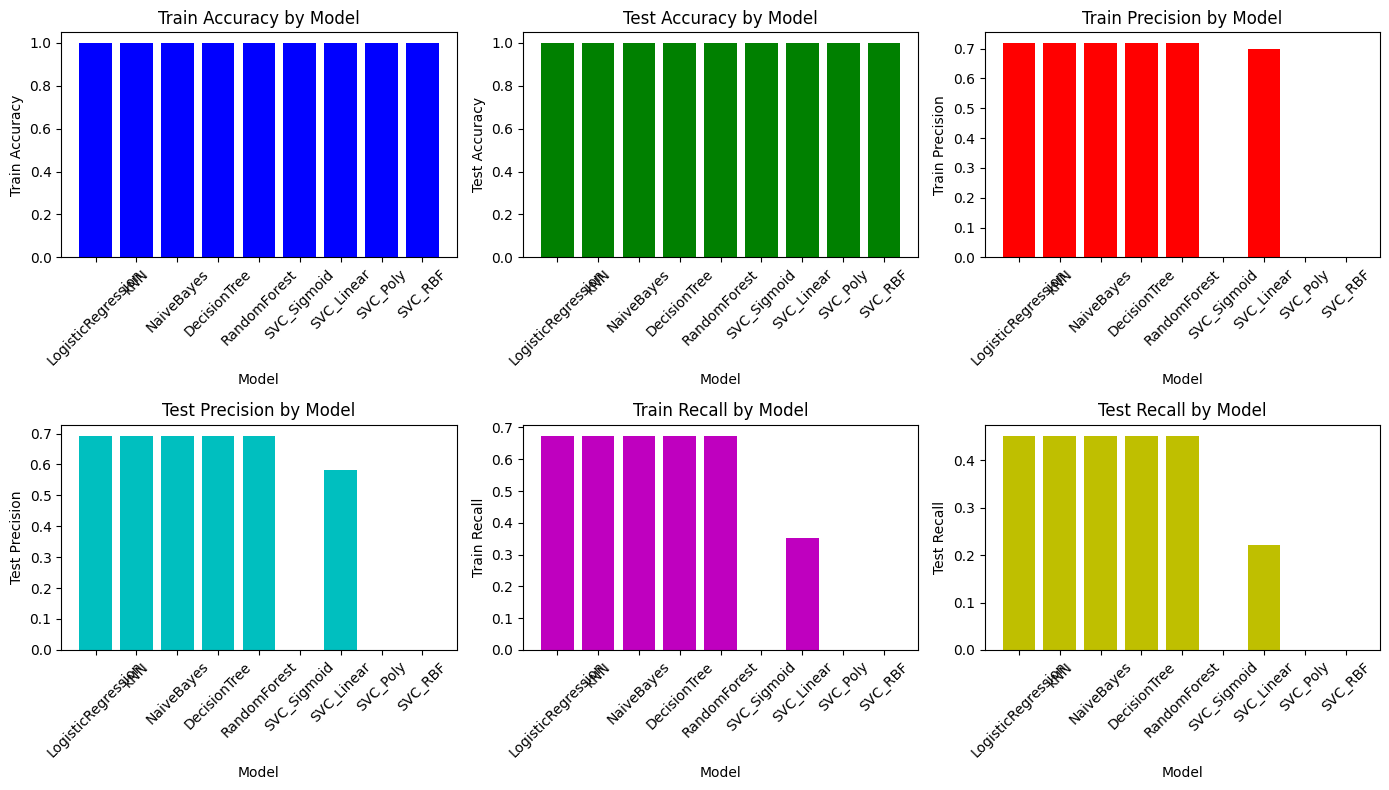

In [22]:
# Set the figure size
plt.figure(figsize=(14, 8))

# Plot the train accuracy
plt.subplot(2, 3, 1)
plt.bar(df_flattened['Model'], df_flattened['train-accuracy'], color='b')
plt.xlabel('Model')
plt.ylabel('Train Accuracy')
plt.xticks(rotation=45)
plt.title('Train Accuracy by Model')

# # Plot the test accuracy
plt.subplot(2, 3, 2)
plt.bar(df_flattened['Model'], df_flattened['test-accuracy'], color='g')
plt.xlabel('Model')
plt.ylabel('Test Accuracy')
plt.xticks(rotation=45)
plt.title('Test Accuracy by Model')

# # Plot the train precision
plt.subplot(2, 3, 3)
plt.bar(df_flattened['Model'], df_flattened['train-precision'], color='r')
plt.xlabel('Model')
plt.ylabel('Train Precision')
plt.xticks(rotation=45)
plt.title('Train Precision by Model')

# # Plot the test precision
plt.subplot(2, 3, 4)
plt.bar(df_flattened['Model'], df_flattened['test-precision'], color='c')
plt.xlabel('Model')
plt.ylabel('Test Precision')
plt.xticks(rotation=45)
plt.title('Test Precision by Model')

# # Plot the train recall
plt.subplot(2, 3, 5)
plt.bar(df_flattened['Model'], df_flattened['train-recall'], color='m')
plt.xlabel('Model')
plt.ylabel('Train Recall')
plt.xticks(rotation=45)
plt.title('Train Recall by Model')

# # Plot the test recall
plt.subplot(2, 3, 6)
plt.bar(df_flattened['Model'], df_flattened['test-recall'], color='y')
plt.xlabel('Model')
plt.ylabel('Test Recall')
plt.xticks(rotation=45)
plt.title('Test Recall by Model')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


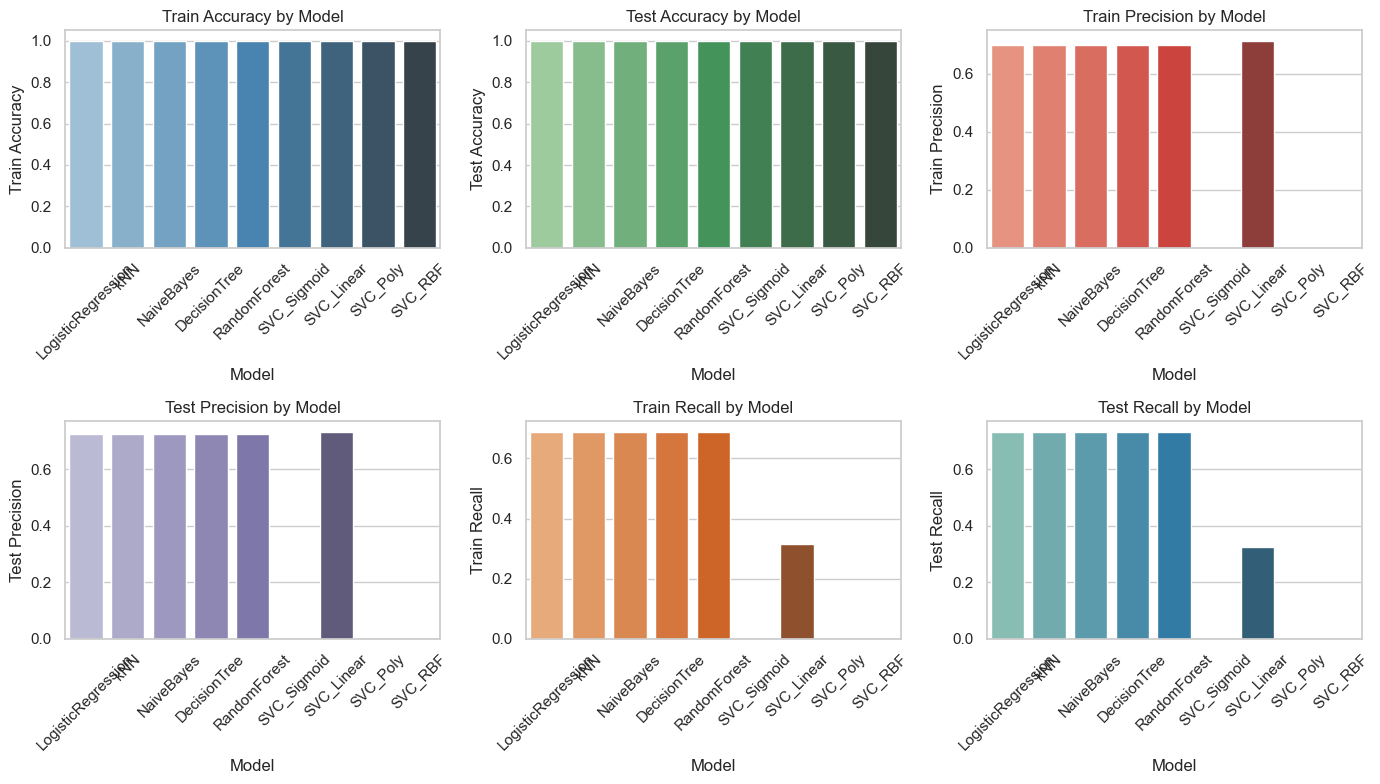

In [47]:
# Set the figure size and style
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# Plot the train accuracy
plt.subplot(2, 3, 1)
sns.barplot(x='Model', y='train-accuracy', data=df_flattened, palette='Blues_d')
plt.xlabel('Model')
plt.ylabel('Train Accuracy')
plt.xticks(rotation=45)
plt.title('Train Accuracy by Model')

# Plot the test accuracy
plt.subplot(2, 3, 2)
sns.barplot(x='Model', y='test-accuracy', data=df_flattened, palette='Greens_d')
plt.xlabel('Model')
plt.ylabel('Test Accuracy')
plt.xticks(rotation=45)
plt.title('Test Accuracy by Model')

# Plot the train precision
plt.subplot(2, 3, 3)
sns.barplot(x='Model', y='train-precision', data=df_flattened, palette='Reds_d')
plt.xlabel('Model')
plt.ylabel('Train Precision')
plt.xticks(rotation=45)
plt.title('Train Precision by Model')

# Plot the test precision
plt.subplot(2, 3, 4)
sns.barplot(x='Model', y='test-precision', data=df_flattened, palette='Purples_d')
plt.xlabel('Model')
plt.ylabel('Test Precision')
plt.xticks(rotation=45)
plt.title('Test Precision by Model')

# Plot the train recall
plt.subplot(2, 3, 5)
sns.barplot(x='Model', y='train-recall', data=df_flattened, palette='Oranges_d')
plt.xlabel('Model')
plt.ylabel('Train Recall')
plt.xticks(rotation=45)
plt.title('Train Recall by Model')

# Plot the test recall
plt.subplot(2, 3, 6)
sns.barplot(x='Model', y='test-recall', data=df_flattened, palette='YlGnBu_d')
plt.xlabel('Model')
plt.ylabel('Test Recall')
plt.xticks(rotation=45)
plt.title('Test Recall by Model')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


In [2]:
! pip install plotly


[notice] A new release of pip is available: 24.1 -> 24.1.1
[notice] To update, run: d:\CodingPlayground\Quantum\FraudDetection\.venv\Scripts\python.exe -m pip install --upgrade pip


In [8]:
pip install nbformat

   ---------------------------------------- 0.0/78.5 kB ? eta -:--:--
   ---------------------------------------- 78.5/78.5 kB 2.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/88.3 kB ? eta -:--:--
   --------------------------- ------------ 61.4/88.3 kB 3.2 MB/s eta 0:00:01
   ---------------------------------------- 88.3/88.3 kB 1.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
   --------------------------------- ------ 51.2/60.8 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 60.8/60.8 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/209.0 kB ? eta -:--:--
   --------------- ------------------------ 81.9/209.0 kB 1.5 MB/s eta 0:00:01
   ----------------------- ---------------- 122.9/209.0 kB 1.8 MB/s eta 0:00:01
   --------------------------------- ------ 174.1/209.0 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 209.0/209.0 kB 1.3 MB/s eta 0:00:00
Note: you 


[notice] A new release of pip is available: 24.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
import pandas as pd
import plotly.express as px

# Load the DataFrame (assuming df_flattened is already defined)
df_flattened = pd.read_csv(EXPORT_FILENAME)

# Create interactive bar plots using Plotly
fig_train_accuracy = px.bar(df_flattened, x='Model', y='train-accuracy', title='Train Accuracy by Model', labels={'train-accuracy': 'Train Accuracy'}, color='Model')
fig_test_accuracy = px.bar(df_flattened, x='Model', y='test-accuracy', title='Test Accuracy by Model', labels={'test-accuracy': 'Test Accuracy'}, color='Model')
fig_train_precision = px.bar(df_flattened, x='Model', y='train-precision', title='Train Precision by Model', labels={'train-precision': 'Train Precision'}, color='Model')
fig_test_precision = px.bar(df_flattened, x='Model', y='test-precision', title='Test Precision by Model', labels={'test-precision': 'Test Precision'}, color='Model')
fig_train_recall = px.bar(df_flattened, x='Model', y='train-recall', title='Train Recall by Model', labels={'train-recall': 'Train Recall'}, color='Model')
fig_test_recall = px.bar(df_flattened, x='Model', y='test-recall', title='Test Recall by Model', labels={'test-recall': 'Test Recall'}, color='Model')

# Update figure layout for each plot
fig_train_accuracy.update_layout(width=1000, height=600, plot_bgcolor='white',bargap=0.2)
fig_test_accuracy.update_layout(width=1000, height=600, plot_bgcolor='white', bargap=0.2)
fig_train_precision.update_layout(width=1000, height=600, plot_bgcolor='white', bargap=0.2)
fig_test_precision.update_layout(width=1000, height=600, plot_bgcolor='white', bargap=0.2)
fig_train_recall.update_layout(width=1000, height=600, plot_bgcolor='white', bargap=0.2)
fig_test_recall.update_layout(width=1000, height=600, plot_bgcolor='white', bargap=0.2)

# Show the interactive plots
fig_train_accuracy.show()
fig_test_accuracy.show()
fig_train_precision.show()
fig_test_precision.show()
fig_train_recall.show()
fig_test_recall.show()


In [49]:
# Example: Scatter plot for precision vs. recall
fig_precision_recall_scatter = px.scatter(df_flattened, x='train-precision', y='test-precision', title='Train Precision vs. Test Precision',
                                         labels={'train-precision': 'Train Precision', 'test-precision': 'Test Precision', 'Model': 'Models'},
                                         color='Model', hover_name='Model')

fig_precision_recall_scatter.update_layout(width=1000, height=600, plot_bgcolor='white')
fig_precision_recall_scatter.show()



In [24]:
# Example: Box plot for test accuracy
fig_test_accuracy_box = px.box(df_flattened, x='Model', y='test-accuracy', title='Test Accuracy Distribution',
                               labels={'test-accuracy': 'Test Accuracy', 'Model': 'Models'}, color='Model')

fig_test_accuracy_box.update_layout(width=1000, height=600, plot_bgcolor='white')
fig_test_accuracy_box.show()


In [15]:
# Example: Violin plot for test precision
fig_test_precision_violin = px.violin(df_flattened, x='Model', y='test-precision', title='Test Precision Distribution',
                                      labels={'test-precision': 'Test Precision', 'Model': 'Models'}, color='Model')

fig_test_precision_violin.update_layout(width=1000, height=600, plot_bgcolor='white')
fig_test_precision_violin.show()
